In [ ]:
!pip install pyarrow
!pip install fastparquet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import geobr
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250);pd.set_option('display.max_rows', 250)
import os

In [2]:
os.chdir('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas')

In [3]:
ano_enem = 2020
df = pd.read_csv(f'MICRODADOS_ENEM_{ano_enem}.csv', encoding='latin1', sep=';', usecols=['NU_INSCRICAO','NU_ANO','IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_ESCOLA','TP_SEXO','TP_ESTADO_CIVIL','Q005','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NO_MUNICIPIO_ESC','NU_NOTA_REDACAO','NO_MUNICIPIO_PROVA','TP_LINGUA','TP_DEPENDENCIA_ADM_ESC','TP_COR_RACA','CO_MUNICIPIO_PROVA','TP_FAIXA_ETARIA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_FAIXA_ETARIA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO'])
df.shape

(5738925, 33)

In [ ]:
ano_enem = 2021
df = pd.read_csv(f'MICRODADOS_ENEM_{ano_enem}.csv', encoding='latin1', sep=';', usecols=['NU_INSCRICAO','NU_ANO','IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_ESCOLA','TP_SEXO','TP_ESTADO_CIVIL','Q005','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NO_MUNICIPIO_ESC','NU_NOTA_REDACAO','NO_MUNICIPIO_PROVA','TP_LINGUA','TP_DEPENDENCIA_ADM_ESC','TP_COR_RACA','CO_MUNICIPIO_PROVA','TP_FAIXA_ETARIA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_FAIXA_ETARIA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO'])
df.shape

(3389832, 28)

In [ ]:
ano_enem = 2022
df = pd.read_csv(f'MICRODADOS_ENEM_{ano_enem}.csv', encoding='latin1', sep=';', usecols=['NU_INSCRICAO','NU_ANO','IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_ESCOLA','TP_SEXO','TP_ESTADO_CIVIL','Q005','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NO_MUNICIPIO_ESC','NU_NOTA_REDACAO','NO_MUNICIPIO_PROVA','TP_LINGUA','TP_DEPENDENCIA_ADM_ESC','TP_COR_RACA','CO_MUNICIPIO_PROVA','TP_FAIXA_ETARIA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_FAIXA_ETARIA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO'])
df.shape

(3476105, 33)

#### Salvar em parquet.

In [ ]:
df.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2020.parquet', index=False)

In [ ]:
ano_enem = 2020
df_enem = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')

#### Base de 2020 com diversos problemas.
#### Apagar Nans pois a base está extremamente pesada, pois não consigo transformar o dtype em int se possui Nans ou textos, preciso fazer retiradas desses itens.

'NU_INSCRICAO','NU_ANO','IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_ESCOLA','TP_SEXO','TP_ESTADO_CIVIL','Q005','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NO_MUNICIPIO_ESC','NU_NOTA_REDACAO','NO_MUNICIPIO_PROVA','TP_LINGUA','TP_DEPENDENCIA_ADM_ESC','TP_COR_RACA','CO_MUNICIPIO_PROVA','TP_FAIXA_ETARIA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_FAIXA_ETARIA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO'

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738660 entries, 0 to 5738924
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   NU_INSCRICAO            int64   
 1   NU_ANO                  int16   
 2   TP_FAIXA_ETARIA         int8    
 3   TP_SEXO                 category
 4   TP_ESTADO_CIVIL         int8    
 5   TP_COR_RACA             int8    
 6   TP_NACIONALIDADE        int8    
 7   TP_ST_CONCLUSAO         int8    
 8   TP_ESCOLA               int8    
 9   IN_TREINEIRO            int8    
 10  NO_MUNICIPIO_ESC        object  
 11  TP_DEPENDENCIA_ADM_ESC  float64 
 12  TP_LOCALIZACAO_ESC      float64 
 13  TP_SIT_FUNC_ESC         float64 
 14  CO_MUNICIPIO_PROVA      int32   
 15  NO_MUNICIPIO_PROVA      object  
 16  SG_UF_PROVA             object  
 17  TP_PRESENCA_CN          int8    
 18  TP_PRESENCA_CH          int8    
 19  TP_PRESENCA_LC          int8    
 20  TP_PRESENCA_MT          int8    
 21  NU_NOTA_

In [4]:
df['NU_INSCRICAO'].isna().sum()

2

In [5]:
df = df.dropna(subset=[('NU_INSCRICAO')])

In [6]:
df['NU_INSCRICAO'] = df['NU_INSCRICAO'].astype('int64')

In [166]:
df.shape

(5738661, 33)

In [167]:
5738925 - 5738661

264

In [7]:
df['NU_ANO'].isna().sum()

2

In [8]:
df = df.dropna(subset=[('NU_ANO')])

In [9]:
df['NU_ANO'].unique()

array([2020, '2020', 'DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD', '2',
       'EBACACBCCBCCCBDDACCECEBDCCBCCCCCCCCCCDCCBCCCC', '20', '1', 'B',
       'F', 'AABCBDCDAEDADDDCBCADEECEECACACDABDAEADEEBBCED', 'A',
       'BACEBBCADEBCEDAECCD*EDCDCDDBDBCDECAABDCDDDDDD',
       'EEACD99999BBACADDDDADCEADEAAAACBCAECAEACDBECACBCDC',
       'BDECBCCDEDDAEBDCDDCBBEDABCCBACDBDEECCADEDBECE'], dtype=object)

In [10]:
df_dif = df.loc[~df["NU_ANO"].isin([2020 , '2020'])]

In [11]:
df_dif.shape

(15, 33)

In [12]:
df = df.loc[df['NU_ANO'].isin([2020 , '2020'])]

In [13]:
df['NU_ANO'] = df['NU_ANO'].astype('int16')

In [14]:
df['IN_TREINEIRO'].isna().sum()

5

In [15]:
df = df.dropna(subset=[('IN_TREINEIRO')])

In [16]:
df['IN_TREINEIRO'].unique()

array([0, 1, '0', '1', 'DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD',
       'AAAAA99999AEBDAADADADBCABADDECDADDCEAAAACCAAAAAABC', '180', '120',
       '377', 'D', 'BACCBABBAEBEDBADCDCEBEACBAABEDDBAABCEDDBDBCDA', '31',
       '160'], dtype=object)

In [16]:
df_dif = df.loc[~df['IN_TREINEIRO'].isin([0 , 1, '0', '1'])]

In [17]:
df = df.loc[df['IN_TREINEIRO'].isin([0 , 1, '0', '1'])]

In [18]:
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].astype('int8')

In [19]:
df['TP_FAIXA_ETARIA'].isna().sum()

0

In [22]:
df['TP_FAIXA_ETARIA'].unique()

array([11,  4,  2,  3,  9,  5,  6,  7, 13, 10, 12,  8,  1, 15, 16, 14, 17,
       18, 19, 20], dtype=int8)

In [21]:
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].astype('int8')

In [23]:
df['TP_SEXO'].isna().sum()

0

In [24]:
df['TP_SEXO'].unique()

array(['F', 'M'], dtype=object)

In [25]:
df['TP_SEXO'] = df['TP_SEXO'].astype('category')

In [26]:
df['TP_ESTADO_CIVIL'].isna().sum()

1

In [27]:
df = df.dropna(subset=[('TP_ESTADO_CIVIL')])

In [28]:
df['TP_ESTADO_CIVIL'].unique()

array([1, 2, 0, 3, 4, '1', '3', '0', '2', '4'], dtype=object)

In [29]:
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].astype('int8')

In [30]:
df['TP_COR_RACA'].isna().sum()

0

In [31]:
df['TP_COR_RACA'].unique()

array([2, 3, 1, 0, 4, 5, '3', '1', '0', '2', '4', '5'], dtype=object)

In [32]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].astype('int8')

In [33]:
df['TP_NACIONALIDADE'].isna().sum()

0

In [34]:
df['TP_NACIONALIDADE'].unique()

array([1, 2, 4, 3, 0, '1', '2', '3', '4', '0'], dtype=object)

In [35]:
df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].astype('int8')

In [36]:
df['TP_ST_CONCLUSAO'].isna().sum()

0

In [37]:
df['TP_ST_CONCLUSAO'].unique()

array([1, 2, 3, 4, '2', '3', '1', '4'], dtype=object)

In [38]:
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].astype('int8')

In [39]:
df['TP_ESCOLA'].isna().sum()

0

##### Verificar esse o original pra ver se tem o 4

In [43]:
df['TP_ESCOLA'].unique()

array([1, 2, 3], dtype=int8)

In [41]:
df = df.loc[df['TP_ESCOLA'].isin([0 , 1, 2, 3, 4, '0', '1' , '2', '3', '4'])]

In [42]:
df['TP_ESCOLA'] = df['TP_ESCOLA'].astype('int8')

##### Não posso apagar o NA nesse caso.

In [44]:
df['NO_MUNICIPIO_ESC'].isna().sum()

4840960

In [87]:
df['NO_MUNICIPIO_ESC'].unique()

array([nan, 'Salvador', 'Santana de Parnaíba', ..., 'Doutor Ricardo',
       'Boa Esperança do Iguaçu', 'Pouso Novo'], dtype=object)

In [45]:
df['NO_MUNICIPIO_ESC'] = df['NO_MUNICIPIO_ESC'].astype('str')

In [46]:
df['TP_DEPENDENCIA_ADM_ESC'].isna().sum()

4840960

In [51]:
df['TP_DEPENDENCIA_ADM_ESC'].unique()

array([nan,  2.,  3.,  1.,  4.])

In [40]:
df_dif = df.loc[~df['TP_DEPENDENCIA_ADM_ESC'].isna() & ~df['TP_DEPENDENCIA_ADM_ESC'].isin([1 , 2, 3, 4, '1', '2', '3', '4'])]

In [48]:
df_dif['TP_DEPENDENCIA_ADM_ESC'].unique()

array(['B', 'C', '1', 'A', 'F', nan, 'G', 'H'], dtype=object)

In [42]:
df_dif.shape

(9, 33)

In [49]:
df = df.loc[df['TP_DEPENDENCIA_ADM_ESC'].isna() | df['TP_DEPENDENCIA_ADM_ESC'].isin([1, 2, 3, 4, '1', '2', '3', '4'])]

In [50]:
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].astype('float64')

In [52]:
df['TP_LOCALIZACAO_ESC'].isna().sum()

4840957

In [53]:
df['TP_LOCALIZACAO_ESC'].unique()

array([nan, 1.0, 2.0, '1', '2', '568',
       'DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD', '120', '160', 'F',
       'A'], dtype=object)

In [48]:
df_dif = df.loc[~df['TP_LOCALIZACAO_ESC'].isna() & ~df['TP_LOCALIZACAO_ESC'].isin([1 , 2, '1', '2'])]

In [49]:
df_dif.shape

(6, 33)

In [54]:
df = df.loc[df['TP_LOCALIZACAO_ESC'].isna() | df['TP_LOCALIZACAO_ESC'].isin([1, 2 ,'1', '2'])]

In [55]:
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].astype('float64')

In [56]:
df['TP_SIT_FUNC_ESC'].isna().sum()

4840956

In [60]:
df['TP_SIT_FUNC_ESC'].unique()

array([nan,  1.,  4.,  2.,  3.])

In [57]:
df_dif = df.loc[~df['TP_SIT_FUNC_ESC'].isna() & ~df['TP_SIT_FUNC_ESC'].isin([1 , 2, 3, 4, '1', '2', '3', '4'])]

In [58]:
df_dif.shape

(3, 33)

In [58]:
df = df.loc[df['TP_SIT_FUNC_ESC'].isna() | df['TP_SIT_FUNC_ESC'].isin([1, 2, 3, 4, '1', '2', '3', '4'])]

In [59]:
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].astype('float64')

In [61]:
df['CO_MUNICIPIO_PROVA'].isna().sum()

2

In [62]:
df = df.dropna(subset=[('CO_MUNICIPIO_PROVA')])

In [63]:
df['CO_MUNICIPIO_PROVA'].unique()

array([1501402, 2408102, 2927408, ..., '2306702', '5103254', '3200805'],
      dtype=object)

In [64]:
df['CO_MUNICIPIO_PROVA'] = df['CO_MUNICIPIO_PROVA'].astype('int32')

In [65]:
df['NO_MUNICIPIO_PROVA'].isna().sum()

2

In [66]:
df = df.dropna(subset=[('NO_MUNICIPIO_PROVA')])

In [67]:
df['NO_MUNICIPIO_PROVA'].unique()

array(['Belém', 'Natal', 'Salvador', ..., 'Sã', 'B', 'Floria'],
      dtype=object)

In [68]:
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].astype('str')

In [69]:
df['SG_UF_PROVA'].isna().sum()

2

In [70]:
df = df.dropna(subset=[('SG_UF_PROVA')])

In [74]:
df['SG_UF_PROVA'].unique()

array(['PA', 'RN', 'BA', 'SP', 'MG', 'RS', 'PE', 'PB', 'CE', 'MS', 'SE',
       'PR', 'AL', 'AM', 'TO', 'RJ', 'DF', 'GO', 'MA', 'PI', 'MT', 'ES',
       'AP', 'SC', 'RR', 'AC', 'RO'], dtype=object)

In [82]:
df_dif = df[df['SG_UF_PROVA'].isin(['B', '598.2', 'DAEAAEADCBBDBEBADDCBEACBDEBACCDCDADDECBBAECEC', 'AAACC99999DBACDAADABDCEDCCBCADECACADEABDDAABBCBAAA', 'AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC', '2020', '99999CDEEBCEDDAAAADADEEDABBBCAEDEDADAEDABDCAEBDAAA', '521.6', 'S', '100', 'A', '505.9'])]

In [83]:
df_dif.shape

(13, 33)

In [72]:
df = df[~df['SG_UF_PROVA'].isin(['B', '598.2', 'DAEAAEADCBBDBEBADDCBEACBDEBACCDCDADDECBBAECEC', 'AAACC99999DBACDAADABDCEDCCBCADECACADEABDDAABBCBAAA', 'AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC', '2020', '99999CDEEBCEDDAAAADADEEDABBBCAEDEDADAEDABDCAEBDAAA', '521.6', 'S', '100', 'A', '505.9'])]

In [73]:
df['SG_UF_PROVA'] = df['SG_UF_PROVA'].astype('str')

In [75]:
df['TP_PRESENCA_CN'].isna().sum()

0

In [76]:
df['TP_PRESENCA_CN'].unique()

array([0, 1, 2, '1', '0', '2',
       'AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACBBECE', 'A'],
      dtype=object)

In [109]:
df_dif = df.loc[~df['TP_PRESENCA_CN'].isin([0 , 1, 2, '0', '1', '2'])]

In [110]:
df_dif.shape

(2, 33)

In [77]:
df = df.loc[df['TP_PRESENCA_CN'].isin([0 , 1, 2, '0', '1', '2'])]

In [78]:
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].astype('int8')

In [79]:
df['TP_PRESENCA_CH'].isna().sum()

1

In [80]:
df = df.dropna(subset=[('TP_PRESENCA_CH')])

In [81]:
df['TP_PRESENCA_CH'].unique()

array([0, 1, 2, '1', '0', '2', 'A'], dtype=object)

In [82]:
df_dif = df.loc[~df['TP_PRESENCA_CH'].isin([0 , 1, 2, '0', '1', '2'])]

In [123]:
df_dif.shape

(1, 33)

In [83]:
df = df.loc[df['TP_PRESENCA_CH'].isin([0 , 1, 2, '0', '1', '2'])]

In [84]:
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].astype('int8')

In [85]:
df['TP_PRESENCA_LC'].isna().sum()

0

In [86]:
df['TP_PRESENCA_LC'].unique()

array([0, 1, 2, '1', '0', '2', 'B', 'A'], dtype=object)

In [132]:
df_dif = df.loc[~df['TP_PRESENCA_LC'].isin([0 , 1, 2, '0', '1', '2'])]

In [133]:
df_dif.shape

(2, 33)

In [87]:
df = df.loc[df['TP_PRESENCA_LC'].isin([0 , 1, 2, '0', '1', '2'])]

In [88]:
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].astype('int8')

In [89]:
df['TP_PRESENCA_MT'].isna().sum()

2

In [90]:
df = df.dropna(subset=[('TP_PRESENCA_MT')])

In [94]:
df['TP_PRESENCA_MT'].unique()

array([0, 1, 2], dtype=int8)

In [142]:
df_dif = df.loc[~df['TP_PRESENCA_MT'].isin([0 , 1, 2, '0', '1', '2'])]

In [143]:
df_dif.shape

(1, 33)

In [92]:
df = df.loc[df['TP_PRESENCA_MT'].isin([0 , 1, 2, '0', '1', '2'])]

In [93]:
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].astype('int8')

In [95]:
df['NU_NOTA_CN'].isna().sum()

3159342

In [96]:
df['NU_NOTA_CN'].unique()

array([nan, 604.1, 620.8, ..., 787.9, 785.2, 808.3], dtype=object)

In [115]:
df['NU_NOTA_CN'] = pd.to_numeric(df['NU_NOTA_CN'], errors='coerce')



In [116]:
df['NU_NOTA_CN'] = df['NU_NOTA_CN'].astype('float64')

In [125]:
df['NU_NOTA_CH'].isna().sum()

3003916

In [123]:
df['NU_NOTA_CH'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')


In [126]:
df['NU_NOTA_CH'] = df['NU_NOTA_CH'].astype('float64')

In [129]:
df['NU_NOTA_LC'].isna().sum()

3003917

In [128]:
df['NU_NOTA_LC'] = pd.to_numeric(df['NU_NOTA_LC'], errors='coerce')


In [130]:
df['NU_NOTA_LC'] = df['NU_NOTA_LC'].astype('float64')

In [134]:
df['NU_NOTA_MT'].isna().sum()

3159347

In [133]:
df['NU_NOTA_MT'] = pd.to_numeric(df['NU_NOTA_MT'], errors='coerce')

In [135]:
df['NU_NOTA_MT'] = df['NU_NOTA_MT'].astype('float64')

In [138]:
df['TP_LINGUA'].isna().sum()

0

In [137]:
df = df.dropna(subset=[('TP_LINGUA')])

In [147]:
df['TP_LINGUA'].unique()

array([1, 0], dtype=int8)

In [140]:
df_dif = df.loc[~df['TP_LINGUA'].isin([0 , 1, '0', '1'])]

In [141]:
df_dif.shape

(84, 33)

In [143]:
df = df.loc[df['TP_LINGUA'].isin([0 , 1, '0', '1'])]

In [144]:
df['TP_LINGUA'] = df['TP_LINGUA'].astype('int8')

In [152]:
df['NU_NOTA_REDACAO'].isna().sum()

3003950

In [155]:
df['NU_NOTA_REDACAO'].unique()

array([         nan, 5.800000e+02, 7.600000e+02, 7.000000e+02,
       6.000000e+02, 6.400000e+02, 8.000000e+02, 5.000000e+02,
       9.200000e+02, 5.200000e+02, 7.400000e+02, 6.200000e+02,
       0.000000e+00, 7.200000e+02, 5.400000e+02, 9.600000e+02,
       8.400000e+02, 3.800000e+02, 4.600000e+02, 9.400000e+02,
       2.800000e+02, 7.800000e+02, 3.200000e+02, 8.800000e+02,
       8.600000e+02, 8.200000e+02, 6.800000e+02, 3.600000e+02,
       9.000000e+02, 5.600000e+02, 3.400000e+02, 4.400000e+02,
       2.400000e+02, 4.200000e+02, 4.000000e+02, 4.800000e+02,
       3.000000e+02, 6.600000e+02, 9.800000e+02, 2.000000e+02,
       2.600000e+02, 2.200000e+02, 8.000000e+01, 1.800000e+02,
       1.600000e+02, 1.400000e+02, 1.000000e+02, 1.000000e+03,
       1.200000e+02, 4.000000e+01, 6.000000e+01, 1.505502e+06,
       2.000000e+01, 2.000000e+00, 1.000000e+00, 3.556206e+06,
       1.400000e+01, 6.200000e+01, 3.858000e+02, 7.233000e+02,
       4.000000e+00, 5.000000e+00, 1.300000e+01, 3.7770

In [151]:
df['NU_NOTA_REDACAO'] = pd.to_numeric(df['NU_NOTA_REDACAO'], errors='coerce')

In [154]:
df['NU_NOTA_REDACAO'] = df['NU_NOTA_REDACAO'].astype('float64')

In [156]:
df['Q005'].isna().sum()

95992

In [165]:
df['Q005'].unique()

array([nan,  3.,  5.,  2.,  4.,  7.,  1.,  6.,  8., 10.,  9., 18., 12.,
       11., 13., 15., 20., 14., 16., 17., 19.])

In [159]:
df_dif = df[df['Q005'].isin(['D',
       '300', 'B', 'A', 'BDBADAECEDCDADADEBCDAADCDAABCBDECDDDABBAAAABD',
       '180', '740', 'M', '0', 'E',
       'CDEAACAEEEBEBADADAAAAACBAEBDEADACDBBDBACECAAADEBBE', '120', '840',
       'Coari', 'C', 'EABDEDEBECCABEAAADECECACDBEADCCCDBEEACCDACXDB',
       'BABADAECEDDBCDABEEABAADDBDCBBACCADACADBEACCAD', 'F', '60', 'H',
       'BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE', 'TO',
       'DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD', '160', '800',
       '530.6', 'São Leopoldo', '560', 'G',
       'DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX',
       'BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA',
       '99999AEBEEACCBCCBEEBEBECCBAAADBDEAABCADCACECCACABD',
       'AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAAADBB',
       'CDBBADBBCCEACEDEBDACBBCCEEDADEBECCECDADDAEDCA', '100', '140',
       '357.9', '695.8',
       'DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD',
       'ACEBADECABECABDEACBDAEBACEBDAEADBEACCCEADBCBA', '200', '377'])]

In [160]:
df_dif.shape

(88, 33)

In [162]:
df = df[~df['Q005'].isin(['D',
       '300', 'B', 'A', 'BDBADAECEDCDADADEBCDAADCDAABCBDECDDDABBAAAABD',
       '180', '740', 'M', '0', 'E',
       'CDEAACAEEEBEBADADAAAAACBAEBDEADACDBBDBACECAAADEBBE', '120', '840',
       'Coari', 'C', 'EABDEDEBECCABEAAADECECACDBEADCCCDBEEACCDACXDB',
       'BABADAECEDDBCDABEEABAADDBDCBBACCADACADBEACCAD', 'F', '60', 'H',
       'BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE', 'TO',
       'DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD', '160', '800',
       '530.6', 'São Leopoldo', '560', 'G',
       'DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX',
       'BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA',
       '99999AEBEEACCBCCBEEBEBECCBAAADBDEAABCADCACECCACABD',
       'AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAAADBB',
       'CDBBADBBCCEACEDEBDACBBCCEEDADEBECCECDADDAEDCA', '100', '140',
       '357.9', '695.8',
       'DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD',
       'ACEBADECABECABDEACBDAEBACEBDAEADBEACCCEADBCBA', '200', '377'])]

In [164]:
df['Q005'] = df['Q005'].astype('float64')

In [173]:
df['NU_NOTA_COMP1'].isna().sum()

3003909

In [174]:
df['NU_NOTA_COMP1'].unique()

array([         nan, 1.200000e+02, 1.400000e+02, 1.000000e+02,
       1.600000e+02, 0.000000e+00, 8.000000e+01, 1.800000e+02,
       6.000000e+01, 4.000000e+01, 2.000000e+02, 2.000000e+01,
       3.500000e+01, 1.000000e+00, 3.550308e+06])

In [172]:
df['NU_NOTA_COMP1'] = pd.to_numeric(df['NU_NOTA_COMP1'], errors='coerce')

In [188]:
df = df[(df['NU_NOTA_COMP1'] <= 250) | pd.isna(df['NU_NOTA_COMP1'])]


In [183]:
df_dif = df[df['NU_NOTA_COMP1'] > 250]
df_dif.shape

(1, 33)

In [189]:
df['NU_NOTA_COMP1'] = df['NU_NOTA_COMP1'].astype('float64')

In [193]:
df['NU_NOTA_COMP2'].isna().sum()

3003900

In [195]:
df['NU_NOTA_COMP2'].unique()

array([ nan, 120., 200., 180., 100., 160.,  80.,   0.,  40., 140.,  60.,
         2.,  29.,  35.,   3.,   1.])

In [194]:
df['NU_NOTA_COMP2'] = pd.to_numeric(df['NU_NOTA_COMP2'], errors='coerce')

In [196]:
df['NU_NOTA_COMP2'] = df['NU_NOTA_COMP2'].astype('float64')

In [198]:
df['NU_NOTA_COMP3'].isna().sum()

3003896

In [202]:
df['NU_NOTA_COMP3'].unique()

array([nan, 120.0, 140.0, 180.0, 60.0, 160.0, 100.0, 0.0, 200.0, 80.0,
       40.0, 20.0, '40', '100', '120', '140', '160', '200', '180', '0',
       '80', '60', '20', '4', '1', '2', '3'], dtype=object)

In [200]:
df_dif = df[df['NU_NOTA_COMP3'].isin([ 'B', '515.4',
       'DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD', '3130606', 'BA',
       'D', 'SP', 'A', '2913606'])]

df_dif.shape

(10, 33)

In [201]:
df = df[~df['NU_NOTA_COMP3'].isin([ 'B', '515.4',
       'DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD', '3130606', 'BA',
       'D', 'SP', 'A', '2913606'])]

In [203]:
df['NU_NOTA_COMP3'] = df['NU_NOTA_COMP3'].astype('float64')

In [205]:
df['NU_NOTA_COMP4'].isna().sum()

3003897

In [206]:
df['NU_NOTA_COMP4'].unique()

array([nan, 120.0, 140.0, 160.0, 100.0, 200.0, 180.0, 0.0, 80.0, 60.0,
       40.0, 20.0, '120', '140', '200', '180', '160', '0', '100', '60',
       '80', '20', '40', '13', '1'], dtype=object)

In [207]:
df['NU_NOTA_COMP4'] = df['NU_NOTA_COMP4'].astype('float64')

In [208]:
df['NU_NOTA_COMP5'].isna().sum()

3003898

In [213]:
df['NU_NOTA_COMP5'].unique()

array([nan, 100.0, 160.0, 120.0, 180.0, 80.0, 140.0, 0.0, 60.0, 200.0,
       40.0, 20.0, '40', '120', '80', '160', '200', '140', '180', '100',
       '0', '60', '20'], dtype=object)

In [211]:
df_dif = df[df['NU_NOTA_COMP5'].isin(['M', '1', '6'])]

df_dif.shape

(6, 33)

In [212]:
df = df[~df['NU_NOTA_COMP5'].isin(['M', '1', '6'])]

In [214]:
df['NU_NOTA_COMP5'] = df['NU_NOTA_COMP5'].astype('float64')

In [215]:
frequencia = df['NU_NOTA_COMP5'].value_counts().sort_index()

# Exibindo a distribuição de frequência
print("Distribuição de Frequência das Notas de Ciências da Natureza (NU_NOTA_COMP5):")
print(frequencia)

Distribuição de Frequência das Notas de Ciências da Natureza (NU_NOTA_COMP3):
0.0      227658
20.0     119453
40.0     413918
60.0     178841
80.0     321739
100.0    266270
120.0    354308
140.0    225613
160.0    254104
180.0    166082
200.0    206760
Name: NU_NOTA_COMP5, dtype: int64


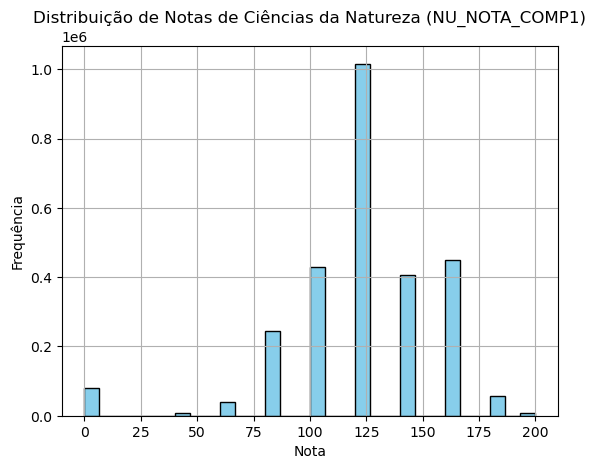

In [191]:
import matplotlib.pyplot as plt

# Plotando o histograma das notas de Ciências da Natureza (NU_NOTA_COMP1)
plt.hist(df['NU_NOTA_COMP1'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Notas de Ciências da Natureza (NU_NOTA_COMP1)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### Salvar em parquet.

In [216]:
df.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2020.parquet', index=False)

In [3]:
ano_enem = 2020
df = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738644 entries, 0 to 5738643
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   NU_INSCRICAO            int64   
 1   NU_ANO                  int16   
 2   TP_FAIXA_ETARIA         int8    
 3   TP_SEXO                 category
 4   TP_ESTADO_CIVIL         int8    
 5   TP_COR_RACA             int8    
 6   TP_NACIONALIDADE        int8    
 7   TP_ST_CONCLUSAO         int8    
 8   TP_ESCOLA               int8    
 9   IN_TREINEIRO            int8    
 10  NO_MUNICIPIO_ESC        object  
 11  TP_DEPENDENCIA_ADM_ESC  float64 
 12  TP_LOCALIZACAO_ESC      float64 
 13  TP_SIT_FUNC_ESC         float64 
 14  CO_MUNICIPIO_PROVA      int32   
 15  NO_MUNICIPIO_PROVA      object  
 16  SG_UF_PROVA             object  
 17  TP_PRESENCA_CN          int8    
 18  TP_PRESENCA_CH          int8    
 19  TP_PRESENCA_LC          int8    
 20  TP_PRESENCA_MT          int8    
 21  NU_NOTA_

#### Ajustes. Os ajustes na base maior poderiam ser feito a cada nicho para poupar memória.

#### 1º ajuste, contagem de abstenções e retirar os treineiros dos anos que houve essa categoria.

#### Funções um pouco adaptadas para inserção de um df com todos anos.

In [4]:
def create_columns_region(uf):
    norte        = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
    nordeste     = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
    centro_oeste = ['MT', 'MS', 'GO']
    sudeste      = ['SP', 'RJ', 'ES', 'MG']
    sul          = ['PR', 'RS', 'SC']
    df           = ['DF']
    
    if uf in norte :
        return 'Norte'
    elif uf in nordeste :
        return 'Nordeste'
    elif uf in centro_oeste : 
        return 'Centro-Oeste'
    elif uf in sudeste : 
        return 'Sudeste'
    elif uf in sul : 
        return 'Sul'
    elif uf in df :
        return 'DF'
    else:
        return 'missing'
    
def get_count(df_enem, cols_to_group, column, column_name = None):
    agg_result = (df_enem
         .groupby(cols_to_group)
         .agg({column:'count'})
         .rename(columns = {column : column_name} )
        )
    return agg_result


def build_statistics_metrics(lista_provas : list, 
                             df_enem : pd.DataFrame, 
                             cols_to_group : list, 
                             list_with_metrics = None):
    if list_with_metrics:
        list_metrics = list_with_metrics
    else:
        list_metrics = { 'MIN_': np.min, 'AVG_' :np.mean, 'MED_' : np.median, 'MAX_' : np.max, 'STD_' : np.std}
    
    def get_statistics(lista_provas, metric, df_enem, cols_to_group, metric_label):

        agg_result = (df_enem
         .groupby(cols_to_group, as_index = False)
         .agg({prova:metric for prova in lista_provas})
         .rename(columns = {prova : metric_label+'_'.join(prova.split('_')[1:]) for prova in lista_provas})
        )

        return agg_result
    
    result = [
        get_statistics(lista_provas, list_metrics[metric], df_enem, cols_to_group, metric).set_index(cols_to_group) 
      for metric in list_metrics
     ]

    result_df = (pd.concat(result, axis=1)
         .reset_index()
        )
    

    return result_df

In [21]:
df['TP_PRESENCA_CN'].isna().sum()

10

In [23]:
df = df.fillna(0)

In [9]:
df['TP_PRESENCA_CN'].unique()

array([0, 1, 2, '1', '0', '2', nan, 'B', '120', '80', '713.4',
       'AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACBBECE',
       'DAEEEDEACAAABBCCEAECCCCDEDCADEACCACEDDCADBEED',
       'ABBABDEDADCEDAECADBDEEBCAEBBBDDCAACAEABBEDCEB',
       'BAEEBBCABEDEECBEBEACBEDCBAAECBCEEEBBABACCBBBA', '3', 'A',
       'ACDDABDEADACBCDBCCADBDADBBCCDABDBCECBECAACEDB', 'D', '476.5',
       'DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX', '180', '800',
       'DCDAA99999DBDBBADDBADADEDAEDAEDAACDCADCADDBBCACADA', 'E', '100',
       'CACBDCCBAECDBBDAEDCEDEDBCDBADDEBDEDCCADABCDCC',
       'CDEAACAEEEBEBADADAAAAACBAEBDEADACDBBDBACECAAADEBBE', '580', '140',
       'C', 'BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA', '549.6',
       'BCDCEBBCCBDDCEBEEBDCDADABCBBDDEDECBADDEBCDDCA', '474.8'],
      dtype=object)

In [11]:
df.shape

(5738925, 7)

In [10]:
df_dif.shape

(72, 7)

In [16]:
df1 = df.loc[df['TP_PRESENCA_CN'].isin([0, 1, 2, '0', '1', '2'])]
df1.head()

,NU_INSCRICAO,NU_ANO,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,2.000063e+11,2020,0,0,0,0,0
1,2.000012e+11,2020,0,1,1,1,1
2,2.000019e+11,2020,0,0,0,0,0
3,2.000019e+11,2020,0,1,1,1,1
4,2.000016e+11,2020,0,0,0,0,0


0

In [17]:
df1.shape

(5738853, 7)

In [ ]:
df_dif = df.loc[~df['TP_PRESENCA_CN'].isin([0, 1, 2, '0', '1', '2'])]
df_dif

In [8]:
df_dif.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\dif.xlsx')

In [ ]:
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].astype('int8')
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].astype('int8')
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].astype('int8')
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].astype('int8')

In [ ]:
df_enem = df

In [24]:
# DATA PREP
notas = df_enem.columns[(df_enem.columns.str.contains('NU_NOTA_')) & (~df_enem.columns.str.contains('NU_NOTA_COMP'))].tolist()
lista_provas = df_enem.columns[(df_enem.columns.str.contains('NU_NOTA_')) & (~df_enem.columns.str.contains('NU_NOTA_COMP'))].tolist()

df_enem = (df_enem
           .query('IN_TREINEIRO != 1')
           .drop(columns = df_enem.columns[df_enem.columns.str.contains('TX_')].tolist()+['IN_TREINEIRO'])
          )


# REGIÃO GEOGRÁFICA
df_enem['TP_REGIAO_PROVA'] = df_enem.SG_UF_PROVA.apply(create_columns_region)
df_enem['TP_REGIAO_ESC'] = df_enem.SG_UF_PROVA.apply(create_columns_region)

# ABSTENÇÃO - PRIMEIRO DIA
df_enem.loc[(df_enem['TP_PRESENCA_CH'] == 0) & (df_enem['TP_PRESENCA_LC'] == 0), ['ABS_DIA_1']] = 1
df_enem.loc[(df_enem['TP_PRESENCA_CH'] != 0) & (df_enem['TP_PRESENCA_LC'] != 0), ['ABS_DIA_1']] = 0
# ABSTENÇÃO - SEGUNDO DIA
df_enem.loc[(df_enem['TP_PRESENCA_CN'] == 0) & (df_enem['TP_PRESENCA_MT'] == 0), ['ABS_DIA_2']] = 1
df_enem.loc[(df_enem['TP_PRESENCA_CN'] != 0) & (df_enem['TP_PRESENCA_MT'] != 0), ['ABS_DIA_2']] = 0
# ABSTENÇÃO FULL DAYS
df_enem.loc[(df_enem['ABS_DIA_1'] == 1) & (df_enem['ABS_DIA_2'] == 1), ['ABS_ALL']] = 1
df_enem.loc[(df_enem['ABS_DIA_1'] != 1) & (df_enem['ABS_DIA_2'] != 1), ['ABS_ALL']] = 0

#Acrescentei tbm a condição ou pois tinha casos com falta em somente em um dia.
df_enem.loc[((df_enem['ABS_DIA_1'] == 0) | (df_enem['ABS_DIA_2'] == 0)), ['ABS_ALL']] = 0

# FLAG ESCOLA NULL
df_enem.loc[df_enem['NO_MUNICIPIO_ESC'].isna(), ['FLAG_NULL_ESC']]  = 1
df_enem.loc[df_enem['NO_MUNICIPIO_ESC'].notna(), ['FLAG_NULL_ESC']] = 0

# MÉDIAS
df_enem['MEDIA_OBJ'] = df_enem[[prova for prova in notas if prova != 'NU_NOTA_REDACAO']].mean(axis = 1)
df_enem['MEDIA_GLOBAL'] = df_enem[notas].mean(axis = 1)

In [25]:
df_enem['ABS_DIA_1'] = df_enem['ABS_DIA_1'].astype('int8')
df_enem['ABS_DIA_2'] = df_enem['ABS_DIA_2'].astype('int8')
df_enem['ABS_ALL'] = df_enem['ABS_ALL'].astype('int8')
df_enem['FLAG_NULL_ESC'] = df_enem['FLAG_NULL_ESC'].astype('int8')

In [19]:
df_enem['ABS_DIA_1'].dtype

dtype('int8')

In [36]:
df_enem.shape

(2963373, 35)

In [91]:
df = df_enem

In [92]:
df.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2021.parquet', index=False)

In [27]:
df.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2022.parquet', index=False)

In [3]:
os.chdir('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas')

## Caso queira carregar daqui 

In [4]:
ano_enem = 2021
df = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')

In [5]:
ano_enem = 2022
df = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')

#### 2º Ajuste. a categoaria TP_ESCOLA que é o tipo de escola, não segue o padrão em todos anos.
#### Padrão:
#### 1 - Não respondeu
#### 2 - Escola pública
#### 3 - Escola Privada
#### 4 - Exterior
#### O modelo do dicionários não foi seguido nos anos de 2012 a 2014, o ano de 2010 nem possui esse item. O modelo de 2012 a 2014 segue:
#### 1 - Escola pública
#### 2 - Escola privada
#### Farei uma adição de +1 para poder ficar na mesma categoria dos outros anos.

In [28]:
df_enem['TP_ESCOLA'] = df_enem['TP_ESCOLA'].astype('int8')
df_enem['NU_ANO'] = df_enem['NU_ANO'].astype('int16')

In [29]:
df_enem.loc[df_enem['NU_ANO'].between(2012, 2014), 'TP_ESCOLA'] = df_enem['TP_ESCOLA'] + 1
df_enem[df_enem['NU_ANO'] == 2022]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL
0,210057943671,2022,14,M,2,2,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
1,210057516120,2022,14,M,2,1,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
2,210057280536,2022,5,F,1,2,1,1,1,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,BA,1,1,1,1,421.1,546.0,498.8,565.3,1,140.0,200.0,120.0,140.0,160.0,760.0,2,Nordeste,Nordeste,0,0,0,1,507.800,558.24
3,210055724397,2022,6,M,1,3,1,1,1,NaN,NaN,NaN,NaN,3201308,Cariacica,ES,1,1,1,1,490.7,388.6,357.8,416.0,1,120.0,40.0,40.0,100.0,20.0,320.0,3,Sudeste,Sudeste,0,0,0,1,413.275,394.62
4,210055097896,2022,4,M,0,3,1,1,1,NaN,NaN,NaN,NaN,1506203,Salinópolis,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2,Norte,Norte,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,2,NaN,NaN,NaN,NaN,3524709,Jaguariúna,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4,Sudeste,Sudeste,1,1,1,1,NaN,NaN
3476101,210057205644,2022,14,F,2,1,1,2,2,Caruaru,2.0,1.0,1.0,2604106,Caruaru,PE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,3,Nordeste,Nordeste,1,1,1,0,NaN,NaN
3476102,210056699189,2022,2,M,1,1,1,2,2,Lages,2.0,1.0,1.0,4209300,Lages,SC,1,1,1,1,527.9,627.0,583.3,637.1,0,140.0,120.0,140.0,140.0,120.0,660.0,4,Sul,Sul,0,0,0,0,593.825,607.06
3476103,210056983033,2022,3,M,1,3,1,2,3,Guaíra,4.0,1.0,1.0,3517406,Guaíra,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5,Sudeste,Sudeste,1,1,1,0,NaN,NaN


#### 3º Ajuste. No item TP_SEXO A base do ano de 2012 não segue o formato abaixo:
#### M - Masculino
#### F - Feminino
#### A base de 2012 segue essa padronização:
#### 0 = Masculino
#### 1 = Feminino
#### Então o ajuste será classificar conforme outros anos.

In [30]:
df_enem['TP_SEXO'] = df_enem['TP_SEXO'].replace({0: 'M', 1: 'F'})
df_enem[df_enem['NU_ANO'] == 2022]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL
0,210057943671,2022,14,M,2,2,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
1,210057516120,2022,14,M,2,1,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
2,210057280536,2022,5,F,1,2,1,1,1,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,BA,1,1,1,1,421.1,546.0,498.8,565.3,1,140.0,200.0,120.0,140.0,160.0,760.0,2,Nordeste,Nordeste,0,0,0,1,507.800,558.24
3,210055724397,2022,6,M,1,3,1,1,1,NaN,NaN,NaN,NaN,3201308,Cariacica,ES,1,1,1,1,490.7,388.6,357.8,416.0,1,120.0,40.0,40.0,100.0,20.0,320.0,3,Sudeste,Sudeste,0,0,0,1,413.275,394.62
4,210055097896,2022,4,M,0,3,1,1,1,NaN,NaN,NaN,NaN,1506203,Salinópolis,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2,Norte,Norte,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,2,NaN,NaN,NaN,NaN,3524709,Jaguariúna,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4,Sudeste,Sudeste,1,1,1,1,NaN,NaN
3476101,210057205644,2022,14,F,2,1,1,2,2,Caruaru,2.0,1.0,1.0,2604106,Caruaru,PE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,3,Nordeste,Nordeste,1,1,1,0,NaN,NaN
3476102,210056699189,2022,2,M,1,1,1,2,2,Lages,2.0,1.0,1.0,4209300,Lages,SC,1,1,1,1,527.9,627.0,583.3,637.1,0,140.0,120.0,140.0,140.0,120.0,660.0,4,Sul,Sul,0,0,0,0,593.825,607.06
3476103,210056983033,2022,3,M,1,3,1,2,3,Guaíra,4.0,1.0,1.0,3517406,Guaíra,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5,Sudeste,Sudeste,1,1,1,0,NaN,NaN


In [31]:
df_enem['TP_SEXO'] = df_enem['TP_SEXO'].astype('category')
df_enem['TP_SEXO'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

#### 4º Ajuste. Os TP_ESTADO_CIVIL de 2011, 2017, 2019, 2020, 2021 e 2022 seguem esse padrão:
#### 0 - Não informado
#### 1 - Solteiro
#### 2 - Casado
#### 3 - Divorciado
#### 4 - Viúvo

#### Os de 2010, 2012 a 2016, 2018 da maneira abaixo:
#### 0 - Solteiro
#### 1 - Casado
#### 2 - Divorciado
#### 3 - Viúvo

#### Bases diferentes, adicionei +1 para as bases de 2010, 2012 a 2016, 2018 para seguirem o padrão dos outros anos.


In [32]:
df_enem['TP_ESTADO_CIVIL'] = df_enem['TP_ESTADO_CIVIL'].astype('int8')
df_enem['TP_ESTADO_CIVIL'].dtype

dtype('int8')

In [33]:
df_enem.loc[df_enem['NU_ANO'].between(2012, 2016), 'TP_ESTADO_CIVIL'] = df_enem['TP_ESTADO_CIVIL'] + 1
df_enem.loc[df_enem['NU_ANO'].isin([2010, 2018]), 'TP_ESTADO_CIVIL'] = df_enem['TP_ESTADO_CIVIL'] + 1
df_enem[df_enem['NU_ANO'] == 2022]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL
0,210057943671,2022,14,M,2,2,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
1,210057516120,2022,14,M,2,1,1,1,1,NaN,NaN,NaN,NaN,5300108,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,DF,DF,1,1,1,1,NaN,NaN
2,210057280536,2022,5,F,1,2,1,1,1,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,BA,1,1,1,1,421.1,546.0,498.8,565.3,1,140.0,200.0,120.0,140.0,160.0,760.0,2,Nordeste,Nordeste,0,0,0,1,507.800,558.24
3,210055724397,2022,6,M,1,3,1,1,1,NaN,NaN,NaN,NaN,3201308,Cariacica,ES,1,1,1,1,490.7,388.6,357.8,416.0,1,120.0,40.0,40.0,100.0,20.0,320.0,3,Sudeste,Sudeste,0,0,0,1,413.275,394.62
4,210055097896,2022,4,M,0,3,1,1,1,NaN,NaN,NaN,NaN,1506203,Salinópolis,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2,Norte,Norte,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,2,NaN,NaN,NaN,NaN,3524709,Jaguariúna,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4,Sudeste,Sudeste,1,1,1,1,NaN,NaN
3476101,210057205644,2022,14,F,2,1,1,2,2,Caruaru,2.0,1.0,1.0,2604106,Caruaru,PE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,3,Nordeste,Nordeste,1,1,1,0,NaN,NaN
3476102,210056699189,2022,2,M,1,1,1,2,2,Lages,2.0,1.0,1.0,4209300,Lages,SC,1,1,1,1,527.9,627.0,583.3,637.1,0,140.0,120.0,140.0,140.0,120.0,660.0,4,Sul,Sul,0,0,0,0,593.825,607.06
3476103,210056983033,2022,3,M,1,3,1,2,3,Guaíra,4.0,1.0,1.0,3517406,Guaíra,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5,Sudeste,Sudeste,1,1,1,0,NaN,NaN


#### 5º Ajuste. Os municípios não seguem mesmo padrão, alguns tem acentos, outros nomes tem hífen outros tem maíusculo outros não, etc... Procurar solução com Lucas, mas amenizei com uma tentativa de padronização. Depois tirar umas dúvidas.

In [34]:
from unidecode import unidecode

In [35]:
df_enem['NO_MUNICIPIO_PROVA'] = df_enem['NO_MUNICIPIO_PROVA'].astype(str)

In [36]:
df_enem['NO_MUNICIPIO_PROVA'] = df_enem['NO_MUNICIPIO_PROVA'].apply(lambda x: unidecode(x))

In [37]:
df_enem['NO_MUNICIPIO_PROVA'] = df_enem['NO_MUNICIPIO_PROVA'].str.replace('[^\w\s]', '').str.upper()

In [ ]:
df_enem['NO_MUNICIPIO_PROVA'].info

In [ ]:
df_enem.info()

In [102]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2021.parquet', index=False)

In [38]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2022.parquet', index=False)

In [ ]:
ano_enem = 2022
df_enem = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')

#### 6º Ajuste. O ano de 2010 está diferente, não sei como inseri-lo, mas os outros anos os ajustes foram relacionados a estarem em outras colunas, unifiquei tudo numa coluna chamada FAMILIA.

In [39]:
def criar_familia(row):
    if row['NU_ANO'] == 2011:
        return row['Q001']
    elif row['NU_ANO'] == 2012:
        return row['Q004']
    elif row['NU_ANO'] == 2013:
        return row['Q004']
    elif row['NU_ANO'] == 2014:
        return row['Q004']
    elif row['NU_ANO'] == 2015:
        return row['Q005']
    elif row['NU_ANO'] == 2016:
        return row['Q005']
    elif row['NU_ANO'] == 2017:
        return row['Q005']
    elif row['NU_ANO'] == 2018:
        return row['Q005']
    elif row['NU_ANO'] == 2019:
        return row['Q005']
    elif row['NU_ANO'] == 2020:
        return row['Q005']
    elif row['NU_ANO'] == 2021:
        return row['Q005']
    elif row['NU_ANO'] == 2022:
        return row['Q005']

In [40]:
df_enem['FAMILIA'] = df_enem.apply(criar_familia, axis=1)
df_enem.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL,FAMILIA
3476100,210056389903,2022,3,M,1,1,1,2,2,NaN,NaN,NaN,NaN,3524709,JAGUARIUNA,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4,Sudeste,Sudeste,1,1,1,1,NaN,NaN,4
3476101,210057205644,2022,14,F,2,1,1,2,2,Caruaru,2.0,1.0,1.0,2604106,CARUARU,PE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,3,Nordeste,Nordeste,1,1,1,0,NaN,NaN,3
3476102,210056699189,2022,2,M,1,1,1,2,2,Lages,2.0,1.0,1.0,4209300,LAGES,SC,1,1,1,1,527.9,627.0,583.3,637.1,0,140.0,120.0,140.0,140.0,120.0,660.0,4,Sul,Sul,0,0,0,0,593.825,607.06,4
3476103,210056983033,2022,3,M,1,3,1,2,3,Guaíra,4.0,1.0,1.0,3517406,GUAIRA,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5,Sudeste,Sudeste,1,1,1,0,NaN,NaN,5
3476104,210056307777,2022,2,F,2,3,1,2,2,Goiânia,2.0,1.0,1.0,5208707,GOIANIA,GO,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,2,Centro-Oeste,Centro-Oeste,1,1,1,0,NaN,NaN,2


In [43]:
# Contar os 0s
contagem_zeros = (df_enem['FAMILIA'] == 0).sum()

# Contar os NaNs
contagem_nans = df_enem['FAMILIA'].isna().sum()

# Exibir os resultados
print(f'Contagem de 0s: {contagem_zeros}')
print(f'Contagem de NaNs: {contagem_nans}')

Contagem de 0s: 0
Contagem de NaNs: 2


In [41]:
df_enem['FAMILIA'] = df_enem['FAMILIA'].astype('int8')

In [105]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2021.parquet', index=False)

In [42]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2022.parquet', index=False)

#### Ajustes de tamanho de outras variáveis.

In [20]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].astype('int8')

In [21]:
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].astype('int8')

In [22]:
df['Q005'] = df['Q005'].astype('int8')

In [23]:
df['TP_LINGUA'] = df['TP_LINGUA'].astype('int8')

In [24]:
df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].astype('int8')

In [25]:
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].astype('int8')

In [26]:
df['CO_MUNICIPIO_PROVA'] = df['CO_MUNICIPIO_PROVA'].astype('int32')

In [ ]:
df.info()

In [114]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2021.parquet', index=False)

In [28]:
df_enem.to_parquet('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\MICRODADOS_ENEM_2022.parquet', index=False)

#### Usar esse para carregar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import geobr
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250);pd.set_option('display.max_rows', 250)
import os

In [3]:
os.chdir('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas')

In [4]:
ano_enem = 2021
df = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')


In [18]:
ano_enem = 2022
df = pd.read_parquet(f'MICRODADOS_ENEM_{ano_enem}.parquet')


In [19]:
df_enem = df


In [ ]:
df.head()

In [ ]:
df.info()

## 1) Inscritos e abstenções por ano.

In [110]:
df_enem['NU_ANO'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2952642 entries, 0 to 3389831
Series name: NU_ANO
Non-Null Count    Dtype
--------------    -----
2952642 non-null  int16
dtypes: int16(1)
memory usage: 28.2 MB


In [14]:
df_enem = df[['NU_ANO']]

In [15]:
# Realizar as operações desejadas
geral = df_enem['NU_ANO'].value_counts().reset_index()
geral.rename(columns={'index': 'NU_ANO', 'NU_ANO': 'QTD_INSCRITOS'}, inplace=True)
geral = geral.sort_values(by='NU_ANO', ascending=True)

# Salvar o DataFrame em um novo DataFrame com nome dinâmico
nome_df = f'geral{ano_enem}'
globals()[nome_df] = geral

#### Zerar df

In [128]:
geral = pd.DataFrame()


In [8]:
geral2021.head()

,NU_ANO,QTD_INSCRITOS
0,2021,2952642


In [16]:
geral2022.head()

,NU_ANO,QTD_INSCRITOS
0,2022,2963373


#### Caso queira concatenar.

In [17]:
geral = pd.concat([geral2021,geral2022])
geral.head()

,NU_ANO,QTD_INSCRITOS
0,2021,2952642
0,2022,2963373


In [40]:
geral.head()

,NU_ANO,QTD_INSCRITOS,ABS_ALL,ABS_ALL_%
0,2021,2952642,960101,32.52
1,2022,2963373,913713,30.83


#### Abstenção por ano:

In [18]:
df_enem = df[['NU_ANO','ABS_ALL']]
df_enem.head()

,NU_ANO,ABS_ALL
0,2022,1
1,2022,1
2,2022,0
3,2022,0
4,2022,1


In [19]:
# Realizar as operações desejadas
geral_abs = df_enem.groupby('NU_ANO')['ABS_ALL'].sum().reset_index()
geral_abs = geral_abs.sort_values(by='NU_ANO', ascending=True)

# Salvar o DataFrame em um novo DataFrame com nome dinâmico
nome_df = f'geral{ano_enem}_abs'
globals()[nome_df] = geral_abs


In [11]:
geral2021_abs.head()

,NU_ANO,ABS_ALL
0,2021,960101


In [20]:
geral2022_abs.head()

,NU_ANO,ABS_ALL
0,2022,913713


#### Caso queira concatenar 

In [21]:
geral_abs = pd.concat([geral2021_abs,geral2022_abs])
geral_abs.head()

,NU_ANO,ABS_ALL
0,2021,960101
0,2022,913713


#### Unir qtd de inscritos e abstenções:

In [22]:
geral = geral.merge(geral_abs, on='NU_ANO', how='left')
geral.head()

,NU_ANO,QTD_INSCRITOS,ABS_ALL
0,2021,2952642,960101
1,2022,2963373,913713


#### Absoluto\Proporção de inscritos por ano.

In [23]:
geral['ABS_ALL_%'] = ((geral['ABS_ALL'] / geral['QTD_INSCRITOS'])*100).round(2)
geral.head()

,NU_ANO,QTD_INSCRITOS,ABS_ALL,ABS_ALL_%
0,2021,2952642,960101,32.52
1,2022,2963373,913713,30.83


#### Salvar

In [39]:
geral.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_ano.xlsx', index=False)

#### Média Objetiva e Geral por ano.

In [26]:
df.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL,FAMILIA
0,2022,14,M,2,2,1,1,1,None,NaN,NaN,NaN,5300108,BRASILIA,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,3,DF,DF,1,1,1,1,NaN,NaN,3
1,2022,14,M,2,1,1,1,1,None,NaN,NaN,NaN,5300108,BRASILIA,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,3,DF,DF,1,1,1,1,NaN,NaN,3
2,2022,5,F,1,2,1,1,1,None,NaN,NaN,NaN,2925758,PRESIDENTE TANCREDO NEVES,BA,1,1,1,1,421.1,546.0,498.8,565.3,1,760.0,2,Nordeste,Nordeste,0,0,0,1,507.800,558.24,2
3,2022,6,M,1,3,1,1,1,None,NaN,NaN,NaN,3201308,CARIACICA,ES,1,1,1,1,490.7,388.6,357.8,416.0,1,320.0,3,Sudeste,Sudeste,0,0,0,1,413.275,394.62,3
4,2022,4,M,0,3,1,1,1,None,NaN,NaN,NaN,1506203,SALINOPOLIS,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,2,Norte,Norte,1,1,1,1,NaN,NaN,2


In [27]:
df_enem = df[['NU_ANO', 'MEDIA_OBJ','MEDIA_GLOBAL']]

In [28]:
# Realizar as operações desejadas
geral_media = df_enem.groupby('NU_ANO')['MEDIA_OBJ','MEDIA_GLOBAL'].mean().reset_index().round(2)
geral_media = geral_media.sort_values(by='NU_ANO', ascending=True)

# Salvar o DataFrame em um novo DataFrame com nome dinâmico
nome_df = f'geral{ano_enem}_media'
globals()[nome_df] = geral_media


In [29]:
geral2022_media.head()

,NU_ANO,MEDIA_OBJ,MEDIA_GLOBAL
0,2022,519.62,538.54


In [ ]:
geral2021_media.head()

In [ ]:
geral_media = pd.concat([geral2021_media,geral2022_media])
geral_media.head()

#### Salvar

In [ ]:
geral_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_ano.xlsx', index=False)

## 2) Tipo de língua.


#### 0 - Inglês
#### 1 - Espanhol


In [84]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_LINGUA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

#### Quantidade por ano.

In [24]:
geral2 = df_enem.groupby(['NU_ANO', 'TP_LINGUA'])['NU_INSCRICAO'].count().reset_index()
geral2 = geral2.pivot(index='NU_ANO', columns='TP_LINGUA', values='NU_INSCRICAO').reset_index()
geral2.columns = ['NU_ANO', 'QTD_INGLES', 'QTD_ESPANHOL']
nome_df = f'geral{ano_enem}2'
globals()[nome_df] = geral2

In [25]:
geral20212.head()

,NU_ANO,QTD_INGLES,QTD_ESPANHOL
0,2021,1496604,1456038


In [20]:
geral20222.head()

,NU_ANO,QTD_INGLES,QTD_ESPANHOL
0,2022,1548122,1415251


In [26]:
geral2 = pd.concat([geral20212,geral20222])
geral2.head()

,NU_ANO,QTD_INGLES,QTD_ESPANHOL
0,2021,1496604,1456038
0,2022,1548122,1415251


#### Salvar

In [39]:
geral2.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Lingua_ano.xlsx', index=False)

#### Absoluto|Proporção por ano.

In [27]:
geral2_pct = geral2[['QTD_INGLES','QTD_ESPANHOL']]
geral2_pct.head()

,QTD_INGLES,QTD_ESPANHOL
0,1496604,1456038
0,1548122,1415251


In [28]:
soma_total = geral2_pct.sum(axis=1)

# Iterar sobre as colunas e criar as colunas percentuais automaticamente
for coluna in geral2_pct.columns:
    if coluna.startswith('QTD_'):  # Certifica-se de que estamos lidando apenas com as colunas relevantes
        coluna_percentual = coluna + '_%'
        proporcao_coluna = geral2_pct[coluna] / soma_total
        geral2_pct[coluna_percentual] = (proporcao_coluna * 100).round(2)


geral2 = geral2.merge(geral2_pct, on=['QTD_INGLES','QTD_ESPANHOL'], how='outer')
geral2.head()

,NU_ANO,QTD_INGLES,QTD_ESPANHOL,QTD_INGLES_%,QTD_ESPANHOL_%
0,2021,1496604,1456038,50.69,49.31
1,2022,1548122,1415251,52.24,47.76


#### Salvar

In [ ]:
geral2.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Lingua_ano.xlsx', index=False)

#### Absoluto|Proporção total.

In [79]:
geral2_prop = df_enem['TP_LINGUA'].value_counts().sort_index()

geral2_prop = pd.DataFrame({'TP_LINGUA': geral2_prop.index, 'QTD_LINGUA': geral2_prop.values})
geral2_prop['QTD_LINGUA_%'] = ((geral2_prop['QTD_LINGUA'] / geral2_prop['QTD_LINGUA'].sum())*100).round(2)
geral2_prop['TP_LINGUA'] = geral2_prop['TP_LINGUA'].map({0: 'Inglês', 1: 'Espanhol'})
geral2_prop.head()

,TP_LINGUA,QTD_LINGUA,QTD_LINGUA_%
0,Inglês,1496604,50.69
1,Espanhol,1456038,49.31


#### Salvar

In [43]:
geral2_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Lingua.xlsx', index=False)

#### Abstenções por língua.

In [35]:
geral2_ABS = df_enem.groupby(['TP_LINGUA'])['ABS_ALL'].sum().reset_index()
geral2_ABS['ABS_ALL_%'] = ((geral2_ABS['ABS_ALL'] / geral2_ABS['ABS_ALL'].sum())*100).round(2)
geral2_ABS['TP_LINGUA'] = geral2_ABS['TP_LINGUA'].map({0: 'Inglês', 1: 'Espanhol'})
geral2_ABS.head()

,TP_LINGUA,ABS_ALL,ABS_ALL_%
0,Inglês,422169,46.2
1,Espanhol,491544,53.8


#### Salvar

In [44]:
geral2_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Lingua.xlsx', index=False)

#### Média por ano das línguas.

In [90]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_LINGUA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [92]:
geral2_media_ano = df_enem.groupby(['NU_ANO', 'TP_LINGUA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral2_media_ano['TP_LINGUA'] = geral2_media_ano['TP_LINGUA'].map({0: 'Inglês', 1: 'Espanhol'})
geral2_media_ano = geral2_media_ano.pivot(index='NU_ANO', columns='TP_LINGUA')
geral2_media_ano = geral2_media_ano.reorder_levels([0 , 1], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}2_media_ano'
globals()[nome_df] = geral2_media_ano

In [87]:
geral20212_media_ano.head()

MEDIA_GLOBAL         MEDIA_OBJ        
TP_LINGUA     Espanhol  Inglês  Espanhol  Inglês
NU_ANO                                          
2021            502.44  556.57    484.37  534.08

In [93]:
geral20222_media_ano.head()

MEDIA_GLOBAL         MEDIA_OBJ       
TP_LINGUA     Espanhol  Inglês  Espanhol Inglês
NU_ANO                                         
2022            510.85  561.25    495.51  539.4

In [94]:
geral2_media_ano = pd.concat([geral20212_media_ano,geral20222_media_ano])
geral2_media_ano.head()

MEDIA_GLOBAL         MEDIA_OBJ        
TP_LINGUA     Espanhol  Inglês  Espanhol  Inglês
NU_ANO                                          
2021            502.44  556.57    484.37  534.08
2022            510.85  561.25    495.51  539.40

#### Salvar. True para salvar o multindex.

In [95]:
geral2_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Lingua_ano.xlsx', index=True)

#### Média por língua.

In [37]:
geral2_media = df_enem.groupby('TP_LINGUA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral2_media['TP_LINGUA'] = geral2_media['TP_LINGUA'].map({0: 'Inglês', 1: 'Espanhol'})
geral2_media.head()

,TP_LINGUA,MEDIA_OBJ,MEDIA_GLOBAL
0,Inglês,539.40,561.25
1,Espanhol,495.51,510.85


#### Salvar

In [82]:
geral2_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Lingua.xlsx', index=False)

NameError: name 'geral2_media' is not defined

## 3) Por tipo de escola.

In [10]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_ESCOLA', 'ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

#### Quantidade por tipo de escola por ano.

In [36]:
geral3 = df_enem.groupby(['NU_ANO', 'TP_ESCOLA'])['NU_INSCRICAO'].count().reset_index()
geral3 = geral3.pivot(index='NU_ANO', columns='TP_ESCOLA', values='NU_INSCRICAO').reset_index()
if 'QTD_EXTERIOR' not in geral3.columns:
    # Se não estiver presente, criar a coluna com valores zero
    geral3['QTD_EXTERIOR'] = 0
geral3.columns = ['NU_ANO', 'QTD_NAO_RESP','QTD_PUBLICA','QTD_PRIVADA','QTD_EXTERIOR']
geral3 = geral3.fillna(0).astype(int) # Possui dados faltantes e possui a falta da variável 'QTD_EXTERIOR' em alguns anos.
nome_df = f'geral{ano_enem}3'
globals()[nome_df] = geral3

In [34]:
geral20213.head()

,NU_ANO,QTD_NAO_RESP,QTD_PUBLICA,QTD_PRIVADA,QTD_EXTERIOR
0,2021,1801787,958611,192244,0


In [37]:
geral20223.head()

,NU_ANO,QTD_NAO_RESP,QTD_PUBLICA,QTD_PRIVADA,QTD_EXTERIOR
0,2022,1645813,1105355,212205,0


In [38]:
geral3 = pd.concat([geral20213,geral20223])
geral3.head()

,NU_ANO,QTD_NAO_RESP,QTD_PUBLICA,QTD_PRIVADA,QTD_EXTERIOR
0,2021,1801787,958611,192244,0
0,2022,1645813,1105355,212205,0


#### Salvar

In [40]:
geral3.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Escola_ano.xlsx', index=False)

#### Absoluto|Proporção por ano. Foi retirado o item "Não respondida" pois faz muita
#### parte da população mas não acrescenta informação (Ver com Lucas)

In [41]:
geral3_pct = geral3[['QTD_PUBLICA','QTD_PRIVADA','QTD_EXTERIOR']]
geral3_pct.head()

,QTD_PUBLICA,QTD_PRIVADA,QTD_EXTERIOR
0,958611,192244,0
0,1105355,212205,0


In [42]:
soma_total = geral3_pct.sum(axis=1)

# Iterar sobre as colunas e criar as colunas percentuais automaticamente
for coluna in geral3_pct.columns:
    if coluna.startswith('QTD_'):  # Certifica-se de que estamos lidando apenas com as colunas relevantes
        coluna_percentual = coluna + '_%'
        proporcao_coluna = geral3_pct[coluna] / soma_total
        geral3_pct[coluna_percentual] = (proporcao_coluna * 100).round(2)


geral3 = geral3.merge(geral3_pct, on=['QTD_PUBLICA', 'QTD_PRIVADA','QTD_EXTERIOR'], how='outer')
geral3 = geral3.drop('QTD_NAO_RESP', axis=1)
geral3.head()

,NU_ANO,QTD_PUBLICA,QTD_PRIVADA,QTD_EXTERIOR,QTD_PUBLICA_%,QTD_PRIVADA_%,QTD_EXTERIOR_%
0,2021,958611,192244,0,83.30,16.70,0.0
1,2022,1105355,212205,0,83.89,16.11,0.0


#### Salvar

In [ ]:
geral3.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Escola_ano.xlsx', index=False)

#### Absoluto|Proporção Total.

In [47]:
geral3_prop = df_enem['TP_ESCOLA'].value_counts().sort_index()

geral3_prop = pd.DataFrame({'TP_ESCOLA': geral3_prop.index, 'CONTAGEM': geral3_prop.values})
geral3_prop['PROPORCAO'] = ((geral3_prop['CONTAGEM'] / geral3_prop['CONTAGEM'].sum())*100).round(2)
geral3_prop['TP_ESCOLA'] = geral3_prop['TP_ESCOLA'].map({1: 'Não respondeu', 2: 'Escola Pública',3: 'Escola Privada',4: 'Exterior'})
geral3_prop.head()

,TP_ESCOLA,CONTAGEM,PROPORCAO
0,Não respondeu,1645813,55.54
1,Escola Pública,1105355,37.30
2,Escola Privada,212205,7.16


#### Salvar

In [52]:
geral3_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Escola.xlsx', index=False)

#### Absoluto|Proporção Total sem os "Não respondeu".

In [48]:
df_filtrado = df_enem[df_enem['TP_ESCOLA'] != 1]
geral3_prop = df_filtrado['TP_ESCOLA'].value_counts().sort_index()
geral3_prop = pd.DataFrame({'TP_ESCOLA': geral3_prop.index, 'CONTAGEM': geral3_prop.values})
geral3_prop['PROPORCAO'] = ((geral3_prop['CONTAGEM'] / geral3_prop['CONTAGEM'].sum()) * 100).round(2)

geral3_prop['TP_ESCOLA'] = geral3_prop['TP_ESCOLA'].map({2: 'Escola Pública', 3: 'Escola Privada', 4: 'Exterior'})
geral3_prop.head()

,TP_ESCOLA,CONTAGEM,PROPORCAO
0,Escola Pública,1105355,83.89
1,Escola Privada,212205,16.11


#### Salvar

In [53]:
geral3_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Escola1.xlsx', index=False)

#### Abstenção por tipo de escola.

In [49]:
geral3_ABS = df_enem.groupby(['TP_ESCOLA'])['ABS_ALL'].sum().reset_index()
geral3_ABS['ABS_ALL_%'] = ((geral3_ABS['ABS_ALL'] / geral3_ABS['ABS_ALL'].sum())*100).round(2)
geral3_ABS['TP_ESCOLA'] = geral3_ABS['TP_ESCOLA'].map({1: 'Não respondeu', 2: 'Escola Pública', 3: 'Escola Privada', 4: 'Exterior'})
geral3_ABS.head()

,TP_ESCOLA,ABS_ALL,ABS_ALL_%
0,Não respondeu,611626,66.94
1,Escola Pública,291102,31.86
2,Escola Privada,10985,1.20


#### Salvar

In [54]:
geral3_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Escola.xlsx', index=False)

#### Abstenção por tipo de escola sem os "Não respondeu"

In [50]:
df_filtrado = df_enem[df_enem['TP_ESCOLA'] != 1]
geral3_ABS = df_filtrado.groupby(['TP_ESCOLA'])['ABS_ALL'].sum().reset_index()
geral3_ABS['ABS_ALL_%'] = ((geral3_ABS['ABS_ALL'] / geral3_ABS['ABS_ALL'].sum()) * 100).round(2)
geral3_ABS['TP_ESCOLA'] = geral3_ABS['TP_ESCOLA'].map({2: 'Escola Pública', 3: 'Escola Privada', 4: 'Exterior'})
geral3_ABS.head()

,TP_ESCOLA,ABS_ALL,ABS_ALL_%
0,Escola Pública,291102,96.36
1,Escola Privada,10985,3.64


#### Salvar

In [55]:
geral3_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Escola1.xlsx', index=False)

#### Média por tipo de escola por ano.

In [12]:
geral3_media_ano = df_enem.groupby(['NU_ANO', 'TP_ESCOLA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral3_media_ano['TP_ESCOLA'] = geral3_media_ano['TP_ESCOLA'].map({1: 'Não respondeu', 2: 'Escola Pública', 3: 'Escola Privada', 4: 'Exterior'})
geral3_media_ano = geral3_media_ano.pivot(index='NU_ANO', columns='TP_ESCOLA')
geral3_media_ano = geral3_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}3_media_ano'
globals()[nome_df] = geral3_media_ano

In [8]:
geral20213_media_ano.head()

TP_ESCOLA Escola Privada           Escola Pública           Não respondeu  \
            MEDIA_GLOBAL MEDIA_OBJ   MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                      
2021              597.11    563.66         504.43    487.78        538.58   

TP_ESCOLA            
          MEDIA_OBJ  
NU_ANO               
2021          517.8

In [13]:
geral20223_media_ano.head()

TP_ESCOLA Escola Privada           Escola Pública           Não respondeu  \
            MEDIA_GLOBAL MEDIA_OBJ   MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                      
2022              606.71    570.43         513.52    498.63        544.96   

TP_ESCOLA            
          MEDIA_OBJ  
NU_ANO               
2022         526.25

In [29]:
geral3_media_ano = pd.concat([geral20213_media_ano,geral20223_media_ano])
geral3_media_ano.head()

TP_ESCOLA Escola Privada           Escola Pública           Não respondeu  \
            MEDIA_GLOBAL MEDIA_OBJ   MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                      
2021              597.11    563.66         504.43    487.78        538.58   
2022              606.71    570.43         513.52    498.63        544.96   

TP_ESCOLA            
          MEDIA_OBJ  
NU_ANO               
2021         517.80  
2022         526.25

#### Salvar, tive que colocar True pois havia problea com multindex que ainda não sei resolver.

In [30]:
geral3_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Escola_ano.xlsx', index=True)

#### Média por tipo de escola.

In [51]:
geral3_media = df_enem.groupby('TP_ESCOLA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral3_media['TP_ESCOLA'] = geral3_media['TP_ESCOLA'].map({1: 'Não respondeu', 2: 'Escola Pública', 3: 'Escola Privada', 4: 'Exterior'})
geral3_media.head()

,TP_ESCOLA,MEDIA_OBJ,MEDIA_GLOBAL
0,Não respondeu,526.25,544.96
1,Escola Pública,498.63,513.52
2,Escola Privada,570.43,606.71


#### Salvar

In [56]:
geral3_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Escola.xlsx', index=False)

## 4) Gênero.

In [49]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_SEXO','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

#### Quantidade.

In [38]:
geral4 = df_enem.groupby(['NU_ANO', 'TP_SEXO'])['NU_INSCRICAO'].count().reset_index()
geral4 = geral4.pivot(index='NU_ANO', columns='TP_SEXO', values='NU_INSCRICAO').reset_index()
geral4.columns = ['NU_ANO', 'QTD_FEM','QTD_MASC']
nome_df = f'geral{ano_enem}4'
globals()[nome_df] = geral4

In [39]:
geral20214.head()

,NU_ANO,QTD_FEM,QTD_MASC
0,2021,1801670,1150972


In [35]:
geral20224.head()

,NU_ANO,QTD_FEM,QTD_MASC
0,2022,1786341,1177032


In [40]:
geral4 = pd.concat([geral20214,geral20224])
geral4.head()

,NU_ANO,QTD_FEM,QTD_MASC
0,2021,1801670,1150972
0,2022,1786341,1177032


#### Salvar

In [41]:
geral4.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Sexo_ano.xlsx', index=False)

#### Absoluto|Proporção por ano por gênero.

In [42]:
geral4_pct = geral4[['QTD_FEM','QTD_MASC']]
geral4_pct.head()

,QTD_FEM,QTD_MASC
0,1801670,1150972
0,1786341,1177032


In [43]:
soma_total = geral4_pct.sum(axis=1)

# Iterar sobre as colunas e criar as colunas percentuais automaticamente
for coluna in geral4_pct.columns:
    if coluna.startswith('QTD_'):  # Certifica-se de que estamos lidando apenas com as colunas relevantes
        coluna_percentual = coluna + '_%'
        proporcao_coluna = geral4_pct[coluna] / soma_total
        geral4_pct[coluna_percentual] = (proporcao_coluna * 100).round(2)

geral4_pct.head()

,QTD_FEM,QTD_MASC,QTD_FEM_%,QTD_MASC_%
0,1801670,1150972,61.02,38.98
0,1786341,1177032,60.28,39.72


In [44]:
geral4 = geral4.merge(geral4_pct, on=['QTD_MASC', 'QTD_FEM'], how='outer')
geral4.head()

,NU_ANO,QTD_FEM,QTD_MASC,QTD_FEM_%,QTD_MASC_%
0,2021,1801670,1150972,61.02,38.98
1,2022,1786341,1177032,60.28,39.72


#### Salvar

In [45]:
geral4.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Sexo_ano.xlsx', index=False)

#### Absoluto|Proporção do total.

In [61]:
geral4_prop = df_enem['TP_SEXO'].value_counts().sort_index()

geral4_prop = pd.DataFrame({'TP_SEXO': geral4_prop.index, 'CONTAGEM': geral4_prop.values})
geral4_prop['PROPORCAO'] = ((geral4_prop['CONTAGEM'] / geral4_prop['CONTAGEM'].sum())*100).round(2)
geral4_prop['TP_SEXO'] = geral4_prop['TP_SEXO'].map({'M': 'Masculino', 'F': 'Feminino'})
geral4_prop.head()

,TP_SEXO,CONTAGEM,PROPORCAO
0,Feminino,1786341,60.28
1,Masculino,1177032,39.72


#### Salvar

In [62]:
geral4_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Sexo.xlsx', index=False)

#### Abstenção por gênero.

In [59]:
geral4_ABS = df_enem.groupby(['TP_SEXO'])['ABS_ALL'].sum().reset_index()
geral4_ABS['ABS_ALL_%'] = ((geral4_ABS['ABS_ALL'] / geral4_ABS['ABS_ALL'].sum())*100).round(2)
geral4_ABS['TP_SEXO'] = geral4_ABS['TP_SEXO'].map({'M': 'Masculino', 'F': 'Feminino'})
geral4_ABS.head()

,TP_SEXO,ABS_ALL,ABS_ALL_%
0,Feminino,547412,59.91
1,Masculino,366301,40.09


#### Salvar

In [63]:
geral4_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Sexo.xlsx', index=False)

#### Média de gênero por ano.

In [50]:
geral4_media_ano = df_enem.groupby(['NU_ANO', 'TP_SEXO'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral4_media_ano['TP_SEXO'] = geral4_media_ano['TP_SEXO'].map({'M': 'Masculino', 'F': 'Feminino'})
geral4_media_ano = geral4_media_ano.pivot(index='NU_ANO', columns='TP_SEXO')
geral4_media_ano = geral4_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}4_media_ano'
globals()[nome_df] = geral4_media_ano


In [47]:
geral20214_media_ano.head()

TP_SEXO     Feminino              Masculino          
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ
NU_ANO                                               
2021           527.4    502.92       538.54    524.34

In [51]:
geral20224_media_ano.head()

TP_SEXO     Feminino              Masculino          
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ
NU_ANO                                               
2022          535.32    512.89       543.45     529.9

In [52]:
geral4_media_ano = pd.concat([geral20214_media_ano,geral20224_media_ano])
geral4_media_ano.head()

TP_SEXO     Feminino              Masculino          
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ
NU_ANO                                               
2021          527.40    502.92       538.54    524.34
2022          535.32    512.89       543.45    529.90

#### Salvar

In [53]:
geral4_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Sexo_ano.xlsx', index=True)

#### Média por gênero.

In [60]:
geral4_media = df_enem.groupby('TP_SEXO')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral4_media['TP_SEXO'] = geral4_media['TP_SEXO'].map({'F': 'Feminino', 'M': 'Masculino'})
geral4_media.head()

,TP_SEXO,MEDIA_OBJ,MEDIA_GLOBAL
0,Feminino,512.89,535.32
1,Masculino,529.90,543.45


#### Salvar

In [64]:
geral4_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Sexo.xlsx', index=False)

## 5) Escola por tipo de administração.

In [59]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_DEPENDENCIA_ADM_ESC','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

#### Quantidade por ano.

In [60]:
geral5 = df_enem.groupby(['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])['NU_INSCRICAO'].count().reset_index()
geral5 = geral5.pivot(index='NU_ANO', columns='TP_DEPENDENCIA_ADM_ESC', values='NU_INSCRICAO').reset_index()
geral5.columns = ['NU_ANO', 'QTD_FEDERAL', 'QTD_ESTADUAL', 'QTD_MUNICIPAL', 'QTD_PRIVADA']
geral5 = geral5.fillna(0).astype(int) #Possui dados faltantes
nome_df = f'geral{ano_enem}5'
globals()[nome_df] = geral5

In [61]:
geral20215.head()

,NU_ANO,QTD_FEDERAL,QTD_ESTADUAL,QTD_MUNICIPAL,QTD_PRIVADA
0,2021,46789,548998,7254,210765


In [57]:
geral20225.head()

,NU_ANO,QTD_FEDERAL,QTD_ESTADUAL,QTD_MUNICIPAL,QTD_PRIVADA
0,2022,49452,666020,9051,227421


In [62]:
geral5 = pd.concat([geral20215,geral20225])
geral5.head()

,NU_ANO,QTD_FEDERAL,QTD_ESTADUAL,QTD_MUNICIPAL,QTD_PRIVADA
0,2021,46789,548998,7254,210765
0,2022,49452,666020,9051,227421


#### Salvar

In [63]:
geral5.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Adm_ano.xlsx', index=False)

#### Absoluto|Proporção por ano dos dados disponíveis e não totais pois há muito dados faltantes.

In [64]:
geral5['TOTAL'] = geral5['QTD_FEDERAL'] + geral5['QTD_ESTADUAL'] + geral5['QTD_MUNICIPAL'] + geral5['QTD_PRIVADA']

for tipo in ['FEDERAL', 'ESTADUAL', 'MUNICIPAL', 'PRIVADA']:
    coluna_qtd = f'QTD_{tipo}'
    coluna_percentual = f'QTD_{tipo}_%'

    geral5[coluna_percentual] = ((geral5[coluna_qtd] / geral5['TOTAL']) * 100).round(2)

geral5.head()

,NU_ANO,QTD_FEDERAL,QTD_ESTADUAL,QTD_MUNICIPAL,QTD_PRIVADA,TOTAL,QTD_FEDERAL_%,QTD_ESTADUAL_%,QTD_MUNICIPAL_%,QTD_PRIVADA_%
0,2021,46789,548998,7254,210765,813806,5.75,67.46,0.89,25.90
0,2022,49452,666020,9051,227421,951944,5.19,69.96,0.95,23.89


#### Salvar

In [65]:
geral5.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Adm_ano.xlsx', index=False)

#### Absoluto|Proporçao total por tipo de adminstraçao na escola.

In [66]:
geral5_prop = df_enem['TP_DEPENDENCIA_ADM_ESC'].value_counts().sort_index()
geral5_prop = pd.DataFrame({'TP_DEPENDENCIA_ADM_ESC': geral5_prop.index, 'CONTAGEM': geral5_prop.values})
geral5_prop['PROPORCAO'] = ((geral5_prop['CONTAGEM'] / geral5_prop['CONTAGEM'].sum())*100).round(2)
geral5_prop['TP_DEPENDENCIA_ADM_ESC'] = geral5_prop['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual',3: 'Municipal',4: 'Privada'})
geral5_prop.head()

,TP_DEPENDENCIA_ADM_ESC,CONTAGEM,PROPORCAO
0,Federal,49452,5.19
1,Estadual,666020,69.96
2,Municipal,9051,0.95
3,Privada,227421,23.89


#### Salvar

In [69]:
geral5_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Adm.xlsx', index=False)

#### Abstenção por tipo de administração da escola.

In [67]:
geral5_ABS = df_enem.groupby(['TP_DEPENDENCIA_ADM_ESC'])['ABS_ALL'].sum().reset_index()
geral5_ABS['ABS_ALL_%'] = ((geral5_ABS['ABS_ALL'] / geral5_ABS['ABS_ALL'].sum())*100).round(2)
geral5_ABS['TP_DEPENDENCIA_ADM_ESC'] = geral5_ABS['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual',3: 'Municipal',4: 'Privada'})
geral5_ABS.head()

,TP_DEPENDENCIA_ADM_ESC,ABS_ALL,ABS_ALL_%
0,Federal,4161,1.90
1,Estadual,198393,90.54
2,Municipal,2859,1.30
3,Privada,13714,6.26


#### Salvar

In [70]:
geral5_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Adm.xlsx', index=False)

#### Média por ano por tipo de dependencia administrativa.

In [76]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_DEPENDENCIA_ADM_ESC','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [77]:
geral5_media_ano = df_enem.groupby(['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral5_media_ano['TP_DEPENDENCIA_ADM_ESC'] = geral5_media_ano['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})
geral5_media_ano = geral5_media_ano.pivot(index='NU_ANO', columns='TP_DEPENDENCIA_ADM_ESC')
geral5_media_ano = geral5_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}5_media_ano'
globals()[nome_df] = geral5_media_ano

In [78]:
geral20215_media_ano.head()

TP_DEPENDENCIA_ADM_ESC     Estadual                Federal            \
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                 
2021                         495.78    482.32       586.08    558.85   

TP_DEPENDENCIA_ADM_ESC    Municipal                Privada            
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                
2021                         510.44    496.25       595.99    563.02

In [74]:
geral20225_media_ano.head()

TP_DEPENDENCIA_ADM_ESC     Estadual                Federal            \
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                 
2022                         505.11    493.83       594.29    562.83   

TP_DEPENDENCIA_ADM_ESC    Municipal                Privada            
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                
2022                         519.29    506.19       606.68    570.53

In [79]:
geral5_media_ano = pd.concat([geral20215_media_ano,geral20225_media_ano])
geral5_media_ano.head()

TP_DEPENDENCIA_ADM_ESC     Estadual                Federal            \
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                 
2021                         495.78    482.32       586.08    558.85   
2022                         505.11    493.83       594.29    562.83   

TP_DEPENDENCIA_ADM_ESC    Municipal                Privada            
                       MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                
2021                         510.44    496.25       595.99    563.02  
2022                         519.29    506.19       606.68    570.53

#### Salvar. True para salvar o multindex que ainda não sei resolver.

In [81]:
geral5_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Adm_ano.xlsx', index=True)

#### Média por tipo de dependência administrativa.

In [68]:
geral5_media = df_enem.groupby('TP_DEPENDENCIA_ADM_ESC')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral5_media['TP_DEPENDENCIA_ADM_ESC'] = geral5_media['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})
geral5_media.head()

,TP_DEPENDENCIA_ADM_ESC,MEDIA_OBJ,MEDIA_GLOBAL
0,Federal,562.83,594.29
1,Estadual,493.83,505.11
2,Municipal,506.19,519.29
3,Privada,570.53,606.68


#### Salvar

In [71]:
geral5_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Adm.xlsx', index=False)

## 6) Etnia.

In [84]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_COR_RACA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [73]:
df_enem['TP_COR_RACA'].value_counts()

3    1301016
1    1158773
2     372491
4      56885
0      56084
5      18124
Name: TP_COR_RACA, dtype: int64

#### Mostra como está ordenado as colunas

In [68]:
print(geral6.columns)

Index(['NU_ANO', 0, 1, 2, 3, 4, 5, 6, '6'], dtype='object', name='TP_COR_RACA')


#### Quantidade Etnia

In [74]:
geral6 = df_enem.groupby(['NU_ANO', 'TP_COR_RACA'])['NU_INSCRICAO'].count().reset_index()
geral6 = geral6.pivot(index='NU_ANO', columns='TP_COR_RACA', values='NU_INSCRICAO').reset_index()
if '6' not in geral6.columns.map(str):
    geral6['6'] = 0
# Renomear as colunas para facilitar a compreensão
geral6.columns = ['NU_ANO', 'QTD_NAO_DECLARADO','QTD_BRANCA','QTD_PRETA','QTD_PARDA','QTD_AMARELA','QTD_INDIGENA','QTD_NAO_DISPOE']
geral6 = geral6.fillna(0).astype(int)
nome_df = f'geral{ano_enem}6'
globals()[nome_df] = geral6

In [70]:
geral20216.head()

,NU_ANO,QTD_NAO_DECLARADO,QTD_BRANCA,QTD_PRETA,QTD_PARDA,QTD_AMARELA,QTD_INDIGENA,QTD_NAO_DISPOE
0,2021,62587,1129348,379834,1303149,60009,17710,5


In [75]:
geral20226.head()

,NU_ANO,QTD_NAO_DECLARADO,QTD_BRANCA,QTD_PRETA,QTD_PARDA,QTD_AMARELA,QTD_INDIGENA,QTD_NAO_DISPOE
0,2022,56084,1158773,372491,1301016,56885,18124,0


In [76]:
geral6 = pd.concat([geral20216,geral20226])
geral6.head()

,NU_ANO,QTD_NAO_DECLARADO,QTD_BRANCA,QTD_PRETA,QTD_PARDA,QTD_AMARELA,QTD_INDIGENA,QTD_NAO_DISPOE
0,2021,62587,1129348,379834,1303149,60009,17710,5
0,2022,56084,1158773,372491,1301016,56885,18124,0


#### Salvar

In [77]:
geral6.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Cor_ano.xlsx', index=False)

#### Absoluto|Proporções por ano.

In [78]:
geral6_pct = geral6[['QTD_NAO_DECLARADO','QTD_BRANCA','QTD_PRETA','QTD_PARDA','QTD_AMARELA','QTD_INDIGENA','QTD_NAO_DISPOE']]
geral6_pct.head()

,QTD_NAO_DECLARADO,QTD_BRANCA,QTD_PRETA,QTD_PARDA,QTD_AMARELA,QTD_INDIGENA,QTD_NAO_DISPOE
0,62587,1129348,379834,1303149,60009,17710,5
0,56084,1158773,372491,1301016,56885,18124,0


In [79]:
soma_total = geral6_pct.sum(axis=1)

# Iterar sobre as colunas e criar as colunas percentuais automaticamente
for coluna in geral6_pct.columns:
    if coluna.startswith('QTD_'):  # Certifica-se de que estamos lidando apenas com as colunas relevantes
        coluna_percentual = coluna + '_%'
        proporcao_coluna = geral6_pct[coluna] / soma_total
        geral6_pct[coluna_percentual] = (proporcao_coluna * 100).round(2)

geral6_pct.head()

geral6 = geral6.merge(geral6_pct, on=['QTD_NAO_DECLARADO','QTD_BRANCA','QTD_PRETA','QTD_PARDA','QTD_AMARELA','QTD_INDIGENA','QTD_NAO_DISPOE'], how='outer')
geral6.head(13)

,NU_ANO,QTD_NAO_DECLARADO,QTD_BRANCA,QTD_PRETA,QTD_PARDA,QTD_AMARELA,QTD_INDIGENA,QTD_NAO_DISPOE,QTD_NAO_DECLARADO_%,QTD_BRANCA_%,QTD_PRETA_%,QTD_PARDA_%,QTD_AMARELA_%,QTD_INDIGENA_%,QTD_NAO_DISPOE_%
0,2021,62587,1129348,379834,1303149,60009,17710,5,2.12,38.25,12.86,44.14,2.03,0.60,0.0
1,2022,56084,1158773,372491,1301016,56885,18124,0,1.89,39.10,12.57,43.90,1.92,0.61,0.0


#### Salvar

In [81]:
geral6.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Cor_ano.xlsx', index=False)

#### Absoluto|Proporções totais.

In [85]:
geral6_prop = df_enem['TP_COR_RACA'].value_counts().sort_index()

geral6_prop = pd.DataFrame({'TP_COR_RACA': geral6_prop.index, 'CONTAGEM': geral6_prop.values})
geral6_prop['PROPORCAO'] = ((geral6_prop['CONTAGEM'] / geral6_prop['CONTAGEM'].sum())*100).round(2)
geral6_prop['TP_COR_RACA'] = geral6_prop['TP_COR_RACA'].map({0: 'Não declarado',1: 'Branca', 2: 'Preta',3: 'Parda',4: 'Amarela', 5:'Indígena', 6:'Não dispões da informação'})
geral6_prop.head(7)

,TP_COR_RACA,CONTAGEM,PROPORCAO
0,Não declarado,56084,1.89
1,Branca,1158773,39.10
2,Preta,372491,12.57
3,Parda,1301016,43.90
4,Amarela,56885,1.92
5,Indígena,18124,0.61


#### Salvar

In [86]:
geral6_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Cor.xlsx', index=False)

#### Abstenções por etnia.

In [87]:
geral6_ABS = df_enem.groupby(['TP_COR_RACA'])['ABS_ALL'].sum().reset_index()
geral6_ABS['ABS_ALL_%'] = ((geral6_ABS['ABS_ALL'] / geral6_ABS['ABS_ALL'].sum())*100).round(2)
geral6_ABS['TP_COR_RACA'] = geral6_ABS['TP_COR_RACA'].map({0: 'Não declaro', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela',5:'Indígena', 6:'Não dispões da informação'})
geral6_ABS.head()

,TP_COR_RACA,ABS_ALL,ABS_ALL_%
0,Não declaro,19572,2.14
1,Branca,311303,34.07
2,Preta,128010,14.01
3,Parda,429600,47.02
4,Amarela,18111,1.98


#### Salvar

In [88]:
geral6_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Cor.xlsx', index=False)

#### Média de etnia por ano.

In [101]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_COR_RACA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [102]:
geral6_media_ano = df_enem.groupby(['NU_ANO', 'TP_COR_RACA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral6_media_ano['TP_COR_RACA'] = geral6_media_ano['TP_COR_RACA'].map({0: 'Não declaro', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela',5:'Indígena', 6:'Não dispões da informação'})
geral6_media_ano = geral6_media_ano.pivot(index='NU_ANO', columns='TP_COR_RACA')
geral6_media_ano = geral6_media_ano.reorder_levels([0 , 1], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}6_media_ano'
globals()[nome_df] = geral6_media_ano

In [98]:
geral20216_media_ano.head()

MEDIA_GLOBAL                               \
TP_COR_RACA      Amarela  Branca Indígena Não declaro   
NU_ANO                                                  
2021              529.57  559.52    470.5      527.68   

                                                      MEDIA_OBJ          \
TP_COR_RACA Não dispões da informação   Parda   Preta   Amarela  Branca   
NU_ANO                                                                    
2021                           481.58  512.53  507.52    509.42  536.48   

                                                                            
TP_COR_RACA Indígena Não declaro Não dispões da informação   Parda   Preta  
NU_ANO                                                                      
2021          460.26      512.09                    479.48  493.46  489.67

In [103]:
geral20226_media_ano.head()

MEDIA_GLOBAL                                               \
TP_COR_RACA      Amarela  Branca Indígena Não declaro   Parda   Preta   
NU_ANO                                                                  
2022              533.98  566.57   479.71      528.42  519.52  514.01   

            MEDIA_OBJ                                               
TP_COR_RACA   Amarela  Branca Indígena Não declaro   Parda   Preta  
NU_ANO                                                              
2022           516.47  543.37    471.0      515.48  503.22  499.02

In [104]:
geral6_media_ano = pd.concat([geral20216_media_ano,geral20226_media_ano])
geral6_media_ano.head()

MEDIA_GLOBAL                               \
TP_COR_RACA      Amarela  Branca Indígena Não declaro   
NU_ANO                                                  
2021              529.57  559.52   470.50      527.68   
2022              533.98  566.57   479.71      528.42   

                                                      MEDIA_OBJ          \
TP_COR_RACA Não dispões da informação   Parda   Preta   Amarela  Branca   
NU_ANO                                                                    
2021                           481.58  512.53  507.52    509.42  536.48   
2022                              NaN  519.52  514.01    516.47  543.37   

                                                                            
TP_COR_RACA Indígena Não declaro Não dispões da informação   Parda   Preta  
NU_ANO                                                                      
2021          460.26      512.09                    479.48  493.46  489.67  
2022          471.00      515.48                       NaN  503.22  499.02

#### Salvar. True para salvar o multindex.

In [105]:
geral6_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Cor_ano.xlsx', index=True)

#### Média por Etnia

In [106]:
geral6_media = df_enem.groupby('TP_COR_RACA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral6_media['TP_COR_RACA'] = geral6_media['TP_COR_RACA'].map({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispões da informação'})
geral6_media.head(7)

,TP_COR_RACA,MEDIA_OBJ,MEDIA_GLOBAL
0,Não declarado,515.48,528.42
1,Branca,543.37,566.57
2,Preta,499.02,514.01
3,Parda,503.22,519.52
4,Amarela,516.47,533.98
5,Indígena,471.00,479.71


#### Salvar

In [107]:
geral6_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Cor.xlsx', index=False)

## 7) Estado Civil.

In [128]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_ESTADO_CIVIL','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [129]:
df_enem['TP_ESTADO_CIVIL'].value_counts()

1    2637014
2     164016
0     111643
3      47231
4       3469
Name: TP_ESTADO_CIVIL, dtype: int64

#### Quantidade.

In [130]:
geral7 = df_enem.groupby(['NU_ANO', 'TP_ESTADO_CIVIL'])['NU_INSCRICAO'].count().reset_index()
geral7 = geral7.pivot(index='NU_ANO', columns='TP_ESTADO_CIVIL', values='NU_INSCRICAO').reset_index()
# Renomear as colunas para facilitar a compreensão
geral7.columns = ['NU_ANO', 'QTD_NAO_INFORMADO','QTD_SOLTEIRO','QTD_CASADO','QTD_DIVORCIADO','QTD_VIUVO']
geral7 = geral7.fillna(0).astype(int) #Possui NAn
nome_df = f'geral{ano_enem}7'
globals()[nome_df] = geral7


In [125]:
geral20217.head()

,NU_ANO,QTD_NAO_INFORMADO,QTD_SOLTEIRO,QTD_CASADO,QTD_DIVORCIADO,QTD_VIUVO
0,2021,125288,2576830,194855,51880,3789


In [131]:
geral20227.head()

,NU_ANO,QTD_NAO_INFORMADO,QTD_SOLTEIRO,QTD_CASADO,QTD_DIVORCIADO,QTD_VIUVO
0,2022,111643,2637014,164016,47231,3469


In [132]:
geral7 = pd.concat([geral20217,geral20227])
geral7.head()

,NU_ANO,QTD_NAO_INFORMADO,QTD_SOLTEIRO,QTD_CASADO,QTD_DIVORCIADO,QTD_VIUVO
0,2021,125288,2576830,194855,51880,3789
0,2022,111643,2637014,164016,47231,3469


#### Salvar

In [133]:
geral7.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Civil_ano.xlsx', index=False)

#### Absoluto|Proporção de estado civil por ano.

In [134]:
geral7_pct = geral7[['QTD_NAO_INFORMADO','QTD_SOLTEIRO','QTD_CASADO','QTD_DIVORCIADO','QTD_VIUVO']]
soma_total = geral7_pct.sum(axis=1)
# Iterar sobre as colunas e criar as colunas percentuais automaticamente
for coluna in geral7_pct.columns:
    if coluna.startswith('QTD_'):  # Certifica-se de que estamos lidando apenas com as colunas relevantes
        coluna_percentual = coluna + '_%'
        proporcao_coluna = geral7_pct[coluna] / soma_total
        geral7_pct[coluna_percentual] = (proporcao_coluna * 100).round(2)

geral7 = geral7.merge(geral7_pct, on=['QTD_NAO_INFORMADO','QTD_SOLTEIRO','QTD_CASADO','QTD_DIVORCIADO','QTD_VIUVO'], how='outer')
geral7.head()

,NU_ANO,QTD_NAO_INFORMADO,QTD_SOLTEIRO,QTD_CASADO,QTD_DIVORCIADO,QTD_VIUVO,QTD_NAO_INFORMADO_%,QTD_SOLTEIRO_%,QTD_CASADO_%,QTD_DIVORCIADO_%,QTD_VIUVO_%
0,2021,125288,2576830,194855,51880,3789,4.24,87.27,6.60,1.76,0.13
1,2022,111643,2637014,164016,47231,3469,3.77,88.99,5.53,1.59,0.12


#### Salvar

In [135]:
geral7.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_Civil_ano.xlsx', index=False)

#### Absoluto|Proporção estado civil total.

In [136]:
geral7_prop = df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

geral7_prop = pd.DataFrame({'TP_ESTADO_CIVIL': geral7_prop.index, 'CONTAGEM': geral7_prop.values})
geral7_prop['PROPORCAO'] = ((geral7_prop['CONTAGEM'] / geral7_prop['CONTAGEM'].sum())*100).round(2)
geral7_prop['TP_ESTADO_CIVIL'] = geral7_prop['TP_ESTADO_CIVIL'].map({0: 'Não informado',1: 'Solteiro(a)', 2: 'Casado(a)',3: 'Divorciado(a)',4: 'Viúvo(a)'})
geral7_prop.head(5)

,TP_ESTADO_CIVIL,CONTAGEM,PROPORCAO
0,Não informado,111643,3.77
1,Solteiro(a),2637014,88.99
2,Casado(a),164016,5.53
3,Divorciado(a),47231,1.59
4,Viúvo(a),3469,0.12


#### Salvar

In [137]:
geral7_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Civil.xlsx', index=False)

#### Abstenção por estado civil.

In [138]:
geral7_ABS = df_enem.groupby(['TP_ESTADO_CIVIL'])['ABS_ALL'].sum().reset_index()
geral7_ABS['ABS_ALL_%'] = ((geral7_ABS['ABS_ALL'] / geral7_ABS['ABS_ALL'].sum())*100).round(2)
geral7_ABS['TP_ESTADO_CIVIL'] = geral7_ABS['TP_ESTADO_CIVIL'].map({0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)', 4: 'Viúvo(a)'})
geral7_ABS.head()

,TP_ESTADO_CIVIL,ABS_ALL,ABS_ALL_%
0,Não informado,46368,5.07
1,Solteiro(a),765319,83.76
2,Casado(a),79860,8.74
3,Divorciado(a),20622,2.26
4,Viúvo(a),1544,0.17


#### Salvar

In [139]:
geral7_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Civil.xlsx', index=False)

#### Média por ano.

In [144]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_ESTADO_CIVIL','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [145]:
geral7_media_ano = df_enem.groupby(['NU_ANO', 'TP_ESTADO_CIVIL'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral7_media_ano['TP_ESTADO_CIVIL'] = geral7_media_ano['TP_ESTADO_CIVIL'].map({0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)', 4: 'Viúvo(a)'})
geral7_media_ano = geral7_media_ano.pivot(index='NU_ANO', columns='TP_ESTADO_CIVIL')
geral7_media_ano = geral7_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}7_media_ano'
globals()[nome_df] = geral7_media_ano

In [146]:
geral20217_media_ano.head()

TP_ESTADO_CIVIL    Casado(a)           Divorciado(a)           Não informado  \
                MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                         
2021                  507.95    499.51         507.4    498.19        517.63   

TP_ESTADO_CIVIL            Solteiro(a)               Viúvo(a)            
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                   
2021               504.79        534.0     512.4       476.53    474.06

In [142]:
geral20227_media_ano.head()

TP_ESTADO_CIVIL    Casado(a)           Divorciado(a)           Não informado  \
                MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                         
2022                  511.49     507.8        512.09    506.81        522.44   

TP_ESTADO_CIVIL            Solteiro(a)               Viúvo(a)            
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                   
2022                511.8       540.75    520.64       478.49    482.95

In [147]:
geral7_media_ano = pd.concat([geral20217_media_ano,geral20227_media_ano])
geral7_media_ano.head()

TP_ESTADO_CIVIL    Casado(a)           Divorciado(a)           Não informado  \
                MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL MEDIA_OBJ  MEDIA_GLOBAL   
NU_ANO                                                                         
2021                  507.95    499.51        507.40    498.19        517.63   
2022                  511.49    507.80        512.09    506.81        522.44   

TP_ESTADO_CIVIL            Solteiro(a)               Viúvo(a)            
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                                   
2021               504.79       534.00    512.40       476.53    474.06  
2022               511.80       540.75    520.64       478.49    482.95

#### Salvar. True para salvar o multindex que ainda não sei resolver.

In [148]:
geral7_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Civil_ano.xlsx', index=True)

#### Média por estado civil.

In [154]:
geral7_media = df_enem.groupby('TP_ESTADO_CIVIL')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral7_media['TP_ESTADO_CIVIL'] = geral7_media['TP_ESTADO_CIVIL'].map({0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)', 4: 'Viúvo(a)'})
geral7_media.head(6)

,TP_ESTADO_CIVIL,MEDIA_OBJ,MEDIA_GLOBAL
0,Não informado,511.80,522.44
1,Solteiro(a),520.64,540.75
2,Casado(a),507.80,511.49
3,Divorciado(a),506.81,512.09
4,Viúvo(a),482.95,478.49


#### Salvar

In [155]:
geral7_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Civil.xlsx', index=False)

## 8) Região geográfica.

#### Média por ano por região geográfica.

In [38]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_REGIAO_PROVA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [162]:
geral8_media_ano = df_enem.groupby(['NU_ANO', 'TP_REGIAO_PROVA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral8_media_ano = geral8_media_ano.pivot(index='NU_ANO', columns='TP_REGIAO_PROVA')
geral8_media_ano = geral8_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}8_media_ano'
globals()[nome_df] = geral8_media_ano

In [159]:
geral20218_media_ano.head()

TP_REGIAO_PROVA Centro-Oeste                     DF               Nordeste  \
                MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                       
2021                  524.08    504.23       547.49     528.9       517.68   

TP_REGIAO_PROVA                  Norte                Sudeste            \
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                    
2021               495.84       500.58    481.28       552.81     532.2   

TP_REGIAO_PROVA          Sul            
                MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                  
2021                  543.67    526.14

In [163]:
geral20228_media_ano.head()

TP_REGIAO_PROVA Centro-Oeste                     DF               Nordeste  \
                MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                       
2022                  530.53    512.71       554.28    536.16       525.22   

TP_REGIAO_PROVA                  Norte                Sudeste            \
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                    
2022               505.78       508.56    491.82       558.84    538.96   

TP_REGIAO_PROVA          Sul            
                MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                  
2022                  550.95    533.72

In [164]:
geral8_media_ano = pd.concat([geral20218_media_ano,geral20228_media_ano])
geral8_media_ano.head()

TP_REGIAO_PROVA Centro-Oeste                     DF               Nordeste  \
                MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                       
2021                  524.08    504.23       547.49    528.90       517.68   
2022                  530.53    512.71       554.28    536.16       525.22   

TP_REGIAO_PROVA                  Norte                Sudeste            \
                MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                    
2021               495.84       500.58    481.28       552.81    532.20   
2022               505.78       508.56    491.82       558.84    538.96   

TP_REGIAO_PROVA          Sul            
                MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                  
2021                  543.67    526.14  
2022                  550.95    533.72

#### Salvar. True para salvar o multindex.

In [165]:
geral8_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Regiao_ano.xlsx', index=True)

#### Média por região geográfica.

In [8]:
geral8_media = df_enem.groupby('TP_REGIAO_PROVA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral8_media.head(6)

,TP_REGIAO_PROVA,MEDIA_OBJ,MEDIA_GLOBAL
0,Centro-Oeste,512.71,530.53
1,DF,536.16,554.28
2,Nordeste,505.78,525.22
3,Norte,491.82,508.56
4,Sudeste,538.96,558.84
5,Sul,533.72,550.95


#### Salvar

In [9]:
geral8_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Regiao.xlsx', index=False)

#### Abstenção por regiao.

In [11]:
geral8_ABS = df_enem.groupby(['TP_REGIAO_PROVA'])['ABS_ALL'].sum().reset_index()
geral8_ABS['ABS_ALL_%'] = ((geral8_ABS['ABS_ALL'] / geral8_ABS['ABS_ALL'].sum())*100).round(2)
geral8_ABS.head(7)

,TP_REGIAO_PROVA,ABS_ALL,ABS_ALL_%
0,Centro-Oeste,71496,7.82
1,DF,16796,1.84
2,Nordeste,302126,33.07
3,Norte,122689,13.43
4,Sudeste,299661,32.80
5,Sul,100945,11.05


#### Salvar

In [12]:
geral8_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Regiao.xlsx', index=False)

## 9) Unidade Federativas - UF

#### Códigos para utilizar funções de UF e Municípios.

In [19]:
municipality_view = ['TP_REGIAO_PROVA','SG_UF_PROVA', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA']
uf_view           = ['TP_REGIAO_PROVA', 'SG_UF_PROVA']
list_metrics      = { 'MIN_': np.min, 'AVG_' :np.mean, 'MED_' : np.median, 'MAX_' : np.max, 'STD_' : np.std}

# TP_ANO_CONCLUIU, TP_ESTADO_CIVIL

cat_columns       = [
    'TP_FAIXA_ETARIA', 'TP_SEXO',
    'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
    'TP_ESCOLA', 'TP_ENSINO',  'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_PRESENCA_CN',
    'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 
]

In [20]:
# DATA PREP
notas = df_enem.columns[(df_enem.columns.str.contains('NU_NOTA_')) & (~df_enem.columns.str.contains('NU_NOTA_COMP'))].tolist()
lista_provas = df_enem.columns[(df_enem.columns.str.contains('NU_NOTA_')) & (~df_enem.columns.str.contains('NU_NOTA_COMP'))].tolist()

In [21]:
def get_count(df_enem, cols_to_group, column, column_name = None):
    agg_result = (df_enem
         .groupby(cols_to_group)
         .agg({column:'count'})
         .rename(columns = {column : column_name} )
        )
    return agg_result


def build_statistics_metrics(lista_provas : list, 
                             df_enem : pd.DataFrame, 
                             cols_to_group : list, 
                             list_with_metrics = None):
    if list_with_metrics:
        list_metrics = list_with_metrics
    else:
        list_metrics = { 'MIN_': np.min, 'AVG_' :np.mean, 'MED_' : np.median, 'MAX_' : np.max, 'STD_' : np.std}
    
    def get_statistics(lista_provas, metric, df_enem, cols_to_group, metric_label):

        agg_result = (df_enem
         .groupby(cols_to_group, as_index = False)
         .agg({prova:metric for prova in lista_provas})
         .rename(columns = {prova : metric_label+'_'.join(prova.split('_')[1:]) for prova in lista_provas})
        )

        return agg_result
    
    result = [
        get_statistics(lista_provas, list_metrics[metric], df_enem, cols_to_group, metric).set_index(cols_to_group) 
      for metric in list_metrics
     ]

    result_df = (pd.concat(result, axis=1)
         .reset_index()
        )
    

    return result_df


#### Média por ano UF.

In [109]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_SEXO','SG_UF_PROVA','TP_REGIAO_PROVA', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [21]:
geral9_media_ano = df_enem.groupby(['NU_ANO', 'SG_UF_PROVA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral9_media_ano = geral9_media_ano.pivot(index='NU_ANO', columns='SG_UF_PROVA')
geral9_media_ano = geral9_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}9_media_ano'
globals()[nome_df] = geral9_media_ano

In [22]:
geral20219_media_ano.head()

SG_UF_PROVA           AC                     AL                     AM  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              503.97    484.65       516.48    493.12       481.89   

SG_UF_PROVA                     AP                     BA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           471.02       499.18    480.31       518.89    496.66   

SG_UF_PROVA           CE                     DF                     ES  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              513.58    496.24       547.49     528.9       541.36   

SG_UF_PROVA                     GO                     MA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           520.64        527.4    505.93       503.33     481.1   

SG_UF_PROVA           MG                     MS                     MT  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021               555.3    531.98       523.39    505.38       516.83   

SG_UF_PROVA                     PA                     PB            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           499.36       505.83    482.77       520.45    496.75   

SG_UF_PROVA           PE                     PI                     PR  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              522.57     500.9       516.22    490.35       539.99   

SG_UF_PROVA                     RJ                     RN            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           523.84       545.21     524.1       529.96    507.67   

SG_UF_PROVA           RO                     RR                     RS  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              504.75    487.67       513.12    497.47       544.92   

SG_UF_PROVA                     SC                     SE            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           526.53       548.18    529.75       523.78    497.97   

SG_UF_PROVA           SP                     TO            
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                     
2021              556.19    537.51       508.34    486.92

In [18]:
geral20229_media_ano.head()

SG_UF_PROVA           AC                     AL                     AM  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2022              510.34    493.22       522.73     503.7        495.2   

SG_UF_PROVA                     AP                     BA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2022           486.09       504.01    488.83       525.31    505.33   

SG_UF_PROVA           CE                     DF                     ES  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2022              521.26    505.56       554.28    536.16       550.74   

SG_UF_PROVA                     GO                     MA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2022           529.59       534.74    515.11        509.6    490.04   

SG_UF_PROVA           MG                     MS                     MT  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2022              563.99    541.34       529.79    513.49       521.37   

SG_UF_PROVA                     PA                     PB            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2022           506.56       510.87    491.49       530.43    508.77   

SG_UF_PROVA           PE                     PI                     PR  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2022              532.43    513.42       523.44    500.92       548.27   

SG_UF_PROVA                     RJ                     RN            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2022           532.74        551.3    531.93       536.28    516.16   

SG_UF_PROVA           RO                     RR                     RS  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2022               513.6    497.95       522.98    509.65       550.91   

SG_UF_PROVA                     SC                     SE            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2022           532.73       556.09     537.5       530.77    507.04   

SG_UF_PROVA           SP                     TO            
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                     
2022              560.43    542.01       518.99    498.95

In [23]:
geral9_media_ano = pd.concat([geral20219_media_ano,geral20229_media_ano])
geral9_media_ano.head()

SG_UF_PROVA           AC                     AL                     AM  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              503.97    484.65       516.48    493.12       481.89   
2022              510.34    493.22       522.73    503.70       495.20   

SG_UF_PROVA                     AP                     BA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           471.02       499.18    480.31       518.89    496.66   
2022           486.09       504.01    488.83       525.31    505.33   

SG_UF_PROVA           CE                     DF                     ES  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              513.58    496.24       547.49    528.90       541.36   
2022              521.26    505.56       554.28    536.16       550.74   

SG_UF_PROVA                     GO                     MA            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           520.64       527.40    505.93       503.33    481.10   
2022           529.59       534.74    515.11       509.60    490.04   

SG_UF_PROVA           MG                     MS                     MT  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              555.30    531.98       523.39    505.38       516.83   
2022              563.99    541.34       529.79    513.49       521.37   

SG_UF_PROVA                     PA                     PB            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           499.36       505.83    482.77       520.45    496.75   
2022           506.56       510.87    491.49       530.43    508.77   

SG_UF_PROVA           PE                     PI                     PR  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              522.57    500.90       516.22    490.35       539.99   
2022              532.43    513.42       523.44    500.92       548.27   

SG_UF_PROVA                     RJ                     RN            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           523.84       545.21    524.10       529.96    507.67   
2022           532.74       551.30    531.93       536.28    516.16   

SG_UF_PROVA           RO                     RR                     RS  \
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL   
NU_ANO                                                                   
2021              504.75    487.67       513.12    497.47       544.92   
2022              513.60    497.95       522.98    509.65       550.91   

SG_UF_PROVA                     SC                     SE            \
            MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                
2021           526.53       548.18    529.75       523.78    497.97   
2022           532.73       556.09    537.50       530.77    507.04   

SG_UF_PROVA           SP                     TO            
            MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                     
2021              556.19    537.51       508.34    486.92  
2022              560.43    542.01       518.99    498.95

#### Salvar. True para salvar o multindex.

In [24]:
geral9_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_UF_ano.xlsx', index=True)

#### Média por UF.

In [27]:
geral9_media = df_enem.groupby('SG_UF_PROVA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral9_media.head(27)

,SG_UF_PROVA,MEDIA_OBJ,MEDIA_GLOBAL
0,AC,484.65,503.97
1,AL,493.12,516.48
2,AM,471.02,481.89
3,AP,480.31,499.18
4,BA,496.66,518.89
5,CE,496.24,513.58
6,DF,528.90,547.49
7,ES,520.64,541.36
8,GO,505.93,527.40
9,MA,481.10,503.33


#### Salvar

In [28]:
geral9_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_UF.xlsx', index=False)

#### Absoluto|Proporção total de sexo por UF.

In [31]:
geral9_prop = df_enem.groupby(['SG_UF_PROVA', 'TP_SEXO']).size().unstack(fill_value=0)
tot = geral9_prop.sum(axis=1)
geral9_prop['QTD_FEM_%'] = ((geral9_prop['F'] / tot ) * 100).round(2)
geral9_prop['QTD_MASC_%'] = ((geral9_prop['M'] / tot) * 100).round(2)

geral9_prop.head(27)

TP_SEXO,F,M,QTD_FEM_%,QTD_MASC_%
SG_UF_PROVA,,,,
AC,12264,8363,59.46,40.54
AL,33400,22191,60.08,39.92
AM,43026,31527,57.71,42.29
AP,11977,8060,59.77,40.23
BA,145197,81279,64.11,35.89
CE,106358,88694,54.53,45.47
DF,34817,23294,59.91,40.09
ES,32512,21628,60.05,39.95
GO,67094,48191,58.20,41.80


#### Salvar

In [32]:
geral9_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_Proporcional_UF.xlsx', index=False)

#### Quantidade de inscritos por UF por ano.

In [18]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_SEXO','SG_UF_PROVA','TP_REGIAO_PROVA', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [96]:
geral9 = get_count(df_enem, uf_view,'NU_INSCRICAO', f'QTD_INSCRITOS_{ano_enem}')
nome_df = f'geral{ano_enem}9'
globals()[nome_df] = geral9

In [93]:
geral20219.head()

QTD_INSCRITOS_2021
TP_REGIAO_PROVA SG_UF_PROVA                    
Centro-Oeste    GO                       116051
                MS                        36552
                MT                        47674
DF              DF                        61461
Nordeste        AL                        49709

In [97]:
geral20229.head()

QTD_INSCRITOS_2022
TP_REGIAO_PROVA SG_UF_PROVA                    
Centro-Oeste    GO                       115285
                MS                        37981
                MT                        49097
DF              DF                        58111
Nordeste        AL                        55591

In [98]:
geral9 = pd.merge(geral20219, geral20229, left_index=True, right_index=True, how='inner')
geral9.head(27)

QTD_INSCRITOS_2021  QTD_INSCRITOS_2022
TP_REGIAO_PROVA SG_UF_PROVA                                        
Centro-Oeste    GO                       116051              115285
                MS                        36552               37981
                MT                        47674               49097
DF              DF                        61461               58111
Nordeste        AL                        49709               55591
                BA                       233543              226476
                CE                       194234              195052
                MA                       112299              113404
                PB                        87508               87823
                PE                       166572              159891
                PI                        67834               70109
                RN                        71251               77279
                SE                        45156               48171
Norte           AC                        18582               20627
                AM                        84445               74553
                AP                        19776               20037
                PA                       164952              174426
                RO                        28682               27167
                RR                         7052                7163
                TO                        26010               24233
Sudeste         ES                        55679               54140
                MG                       282956              259887
                RJ                       210767              219736
                SP                       441458              460124
Sul             PR                       125520              128382
                RS                       130701              131205
                SC                        66218               67423

#### Salvar

In [99]:
geral9.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_UF_ano.xlsx', index=True)

#### Abstenções UFs.

In [12]:
geral9_ABS = df_enem.groupby(['SG_UF_PROVA'])['ABS_ALL'].sum().reset_index()
geral9_ABS['ABS_ALL_%'] = ((geral9_ABS['ABS_ALL'] / geral9_ABS['ABS_ALL'].sum())*100).round(2)
geral9_ABS.head()

,SG_UF_PROVA,ABS_ALL,ABS_ALL_%
0,AC,6829,0.75
1,AL,16854,1.84
2,AM,33025,3.61
3,AP,6738,0.74
4,BA,66379,7.26


#### Salvar

In [101]:
geral9_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_UF.xlsx', index=False)

##### Outros dados estatística por UF.

In [22]:

geral9_statistics = build_statistics_metrics(lista_provas, df_enem, uf_view, list_metrics)
geral9_statistics.head()

,TP_REGIAO_PROVA,SG_UF_PROVA,MIN_NOTA_CN,MIN_NOTA_CH,MIN_NOTA_LC,MIN_NOTA_MT,MIN_NOTA_REDACAO,AVG_NOTA_CN,AVG_NOTA_CH,AVG_NOTA_LC,AVG_NOTA_MT,AVG_NOTA_REDACAO,MED_NOTA_CN,MED_NOTA_CH,MED_NOTA_LC,MED_NOTA_MT,MED_NOTA_REDACAO,MAX_NOTA_CN,MAX_NOTA_CH,MAX_NOTA_LC,MAX_NOTA_MT,MAX_NOTA_REDACAO,STD_NOTA_CN,STD_NOTA_CH,STD_NOTA_LC,STD_NOTA_MT,STD_NOTA_REDACAO
0,Centro-Oeste,GO,0.0,0.0,0.0,0.0,0.0,489.631680,515.688716,497.769450,527.962303,614.028534,477.7,514.50,498.8,505.0,600.0,856.6,846.9,784.5,953.1,1000.0,82.783896,96.033801,79.260900,109.846525,193.815268
1,Centro-Oeste,MS,0.0,0.0,0.0,0.0,0.0,490.204759,513.450594,496.890162,527.836527,596.510706,478.5,511.75,497.8,505.5,580.0,837.2,832.5,777.2,953.1,980.0,81.549154,94.483677,78.601098,109.623383,188.353781
2,Centro-Oeste,MT,0.0,0.0,0.0,0.0,0.0,485.302320,510.599338,488.604313,519.710647,588.193731,476.2,509.90,489.8,496.5,580.0,820.8,846.9,793.5,953.1,980.0,76.916109,94.194118,78.559302,105.653878,196.576918
3,DF,DF,0.0,0.0,0.0,0.0,0.0,508.826866,540.114050,522.214971,550.395124,622.318030,499.5,545.50,527.1,532.0,600.0,848.4,846.9,788.6,953.1,980.0,87.170683,100.735858,80.745003,119.066878,180.195959
4,Nordeste,AL,0.0,0.0,0.0,0.0,0.0,477.175074,502.024692,483.223170,515.072105,610.213811,466.3,495.30,482.7,489.9,600.0,844.5,832.5,758.4,948.5,980.0,76.781851,94.007763,78.801467,106.096935,195.155773


#### Salvar

In [37]:
geral9_statistics.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Estatísticas_UF.xlsx', index=False)

## 10) Municípios. Falta inserir variaveis que não estavam em 2021 como as notas para funcionar as funções.

#### Quantidade de inscritos por municípios:

In [27]:
geral10 = get_count(df_enem, municipality_view, 'NU_INSCRICAO', f'QTD_INSCRITOS_{ano_enem}')
nome_df = f'geral{ano_enem}10'
globals()[nome_df] = geral10

In [11]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,TP_REGIAO_PROVA,TP_REGIAO_ESC,ABS_DIA_1,ABS_DIA_2,ABS_ALL,FLAG_NULL_ESC,MEDIA_OBJ,MEDIA_GLOBAL,FAMILIA
0,210053865474,2021,5,F,1,1,1,1,1,None,NaN,NaN,NaN,3144805,NOVA LIMA,MG,0,1,1,0,NaN,574.6,472.6,NaN,1,760.0,3.0,Sudeste,Sudeste,0,1,0,1,523.600,602.40,3.0
1,210052384164,2021,12,M,1,1,1,1,1,None,NaN,NaN,NaN,2704302,MACEIO,AL,1,1,1,1,505.9,551.8,498.3,461.5,1,560.0,3.0,Nordeste,Nordeste,0,0,0,1,504.375,515.50,3.0
2,210052589243,2021,13,F,3,1,1,1,1,None,NaN,NaN,NaN,3515707,FERRAZ DE VASCONCELOS,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,3.0,Sudeste,Sudeste,1,1,1,1,NaN,NaN,3.0
3,210052128335,2021,3,M,1,3,1,2,2,Crato,2.0,1.0,1.0,2304202,CRATO,CE,1,1,1,1,580.7,678.9,638.9,659.5,0,780.0,6.0,Nordeste,Nordeste,0,0,0,0,639.500,667.60,6.0
4,210051353021,2021,2,F,1,3,1,2,2,Redenção,2.0,1.0,1.0,2300150,ACARAPE,CE,1,1,1,1,497.7,532.4,457.6,582.6,1,780.0,4.0,Nordeste,Nordeste,0,0,0,0,517.575,570.06,4.0


In [24]:
geral202110.head()

QTD_INSCRITOS_2021
TP_REGIAO_PROVA SG_UF_PROVA CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA                       
Centro-Oeste    GO          5200134            ACREUNA                               660
                            5200258            AGUAS LINDAS DE GOIAS                2498
                            5200308            ALEXANIA                              374
                            5200803            ALVORADA DO NORTE                     325
                            5201108            ANAPOLIS                             7864

In [28]:
geral202210.head()

QTD_INSCRITOS_2022
TP_REGIAO_PROVA SG_UF_PROVA CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA                       
Centro-Oeste    GO          5200134            ACREUNA                               515
                            5200258            AGUAS LINDAS DE GOIAS                3089
                            5200308            ALEXANIA                              362
                            5200803            ALVORADA DO NORTE                     261
                            5201108            ANAPOLIS                             7638

In [30]:
geral10 = pd.merge(geral202110, geral202210, left_index=True, right_index=True, how='inner')
geral10.head()

QTD_INSCRITOS_2021  \
TP_REGIAO_PROVA SG_UF_PROVA CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA                          
Centro-Oeste    GO          5200134            ACREUNA                               660   
                            5200258            AGUAS LINDAS DE GOIAS                2498   
                            5200308            ALEXANIA                              374   
                            5200803            ALVORADA DO NORTE                     325   
                            5201108            ANAPOLIS                             7864   

                                                                      QTD_INSCRITOS_2022  
TP_REGIAO_PROVA SG_UF_PROVA CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA                         
Centro-Oeste    GO          5200134            ACREUNA                               515  
                            5200258            AGUAS LINDAS DE GOIAS                3089  
                            5200308            ALEXANIA                              362  
                            5200803            ALVORADA DO NORTE                     261  
                            5201108            ANAPOLIS                             7638

#### Salvar

In [31]:
geral10.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Município_ano.xlsx', index=True)

#### Média dos municípios por ano.

In [32]:
df_enem = df[['NU_INSCRICAO','NU_ANO','TP_SEXO','SG_UF_PROVA','TP_REGIAO_PROVA', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA','ABS_ALL','MEDIA_GLOBAL','MEDIA_OBJ']]

In [12]:
geral10_media_ano = df_enem.groupby(['NU_ANO', 'CO_MUNICIPIO_PROVA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral10_media_ano = geral10_media_ano.pivot(index='NU_ANO', columns='CO_MUNICIPIO_PROVA')
geral10_media_ano = geral10_media_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}10_media_ano'
globals()[nome_df] = geral10_media_ano

In [13]:
geral202110_media_ano= geral202110_media_ano.transpose()
geral202110_media_ano.head()

NU_ANO                             2021
CO_MUNICIPIO_PROVA                     
1100015            MEDIA_GLOBAL  510.36
                   MEDIA_OBJ     491.39
1100023            MEDIA_GLOBAL  508.46
                   MEDIA_OBJ     489.53
1100049            MEDIA_GLOBAL  519.44

In [8]:
geral202210_media_ano= geral202210_media_ano.transpose()

In [9]:
geral202210_media_ano.head()

NU_ANO                             2022
CO_MUNICIPIO_PROVA                     
1100015            MEDIA_GLOBAL  522.35
                   MEDIA_OBJ     500.95
1100023            MEDIA_GLOBAL  520.29
                   MEDIA_OBJ     503.74
1100049            MEDIA_GLOBAL  526.21

In [16]:
geral10_media_ano = pd.merge(geral202110_media_ano, geral202210_media_ano, left_index=True, right_index=True, how='inner')
geral10_media_ano.head()

NU_ANO                             2021    2022
CO_MUNICIPIO_PROVA                             
1100015            MEDIA_GLOBAL  510.36  522.35
                   MEDIA_OBJ     491.39  500.95
1100023            MEDIA_GLOBAL  508.46  520.29
                   MEDIA_OBJ     489.53  503.74
1100049            MEDIA_GLOBAL  519.44  526.21

#### Salvar. True para salvar o multindex.

In [35]:
geral10_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Municipio_ano.xlsx', index=True)

#### Média por município.

In [34]:
geral10_media = df_enem.groupby('CO_MUNICIPIO_PROVA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral10_media.head()

,CO_MUNICIPIO_PROVA,MEDIA_OBJ,MEDIA_GLOBAL
0,1100015,500.95,522.35
1,1100023,503.74,520.29
2,1100049,508.92,526.21
3,1100056,503.30,519.39
4,1100064,507.79,529.86


In [35]:
geral10_media1 = df_enem[['CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA']]
map_dict = geral10_media1.set_index('CO_MUNICIPIO_PROVA')['NO_MUNICIPIO_PROVA'].to_dict()
geral10_media['NO_MUNICIPIO_PROVA'] = geral10_media['CO_MUNICIPIO_PROVA'].map(map_dict)

In [36]:
geral10_media = geral10_media[['CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'MEDIA_OBJ', 'MEDIA_GLOBAL']]
geral10_media.head()

,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,MEDIA_OBJ,MEDIA_GLOBAL
0,1100015,ALTA FLORESTA DOESTE,500.95,522.35
1,1100023,ARIQUEMES,503.74,520.29
2,1100049,CACOAL,508.92,526.21
3,1100056,CEREJEIRAS,503.30,519.39
4,1100064,COLORADO DO OESTE,507.79,529.86


In [38]:
geral10_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Municipio.xlsx', index=False)

#### Absoluto|Proporção total por município.

In [41]:
geral10_prop = df_enem.groupby(['CO_MUNICIPIO_PROVA', 'TP_SEXO']).size().unstack(fill_value=0)
tot = geral10_prop.sum(axis=1)
geral10_prop['QTD_FEM_%'] = ((geral10_prop['F'] / tot ) * 100).round(2)
geral10_prop['QTD_MASC_%'] = ((geral10_prop['M'] / tot) * 100).round(2)
geral10_prop = geral10_prop.rename(columns={'M': 'QTD_MASC', 'F': 'QTD_FEM'})
geral10_prop.head()

TP_SEXO,QTD_FEM,QTD_MASC,QTD_FEM_%,QTD_MASC_%
CO_MUNICIPIO_PROVA,,,,
1100015,182,100,64.54,35.46
1100023,985,589,62.58,37.42
1100049,1094,687,61.43,38.57
1100056,148,108,57.81,42.19
1100064,175,127,57.95,42.05


In [42]:
geral10_media1 = df_enem[['CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA']]
map_dict = geral10_media1.set_index('CO_MUNICIPIO_PROVA')['NO_MUNICIPIO_PROVA'].to_dict()
geral10_prop['NO_MUNICIPIO_PROVA'] = geral10_prop.index.map(map_dict)
geral10_prop.head()

TP_SEXO,QTD_FEM,QTD_MASC,QTD_FEM_%,QTD_MASC_%,NO_MUNICIPIO_PROVA
CO_MUNICIPIO_PROVA,,,,,
1100015,182,100,64.54,35.46,ALTA FLORESTA DOESTE
1100023,985,589,62.58,37.42,ARIQUEMES
1100049,1094,687,61.43,38.57,CACOAL
1100056,148,108,57.81,42.19,CEREJEIRAS
1100064,175,127,57.95,42.05,COLORADO DO OESTE


In [43]:
geral10_prop = geral10_prop[['NO_MUNICIPIO_PROVA', 'QTD_FEM', 'QTD_MASC', 'QTD_FEM_%' , 'QTD_MASC_%']]
geral10_prop.head()

TP_SEXO,NO_MUNICIPIO_PROVA,QTD_FEM,QTD_MASC,QTD_FEM_%,QTD_MASC_%
CO_MUNICIPIO_PROVA,,,,,
1100015,ALTA FLORESTA DOESTE,182,100,64.54,35.46
1100023,ARIQUEMES,985,589,62.58,37.42
1100049,CACOAL,1094,687,61.43,38.57
1100056,CEREJEIRAS,148,108,57.81,42.19
1100064,COLORADO DO OESTE,175,127,57.95,42.05


##### Outros dados estatística por UF.

In [44]:
geral10_statistics = build_statistics_metrics(lista_provas, df_enem, municipality_view, list_metrics)
geral10_statistics.head()

,TP_REGIAO_PROVA,SG_UF_PROVA,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,MIN_NOTA_CN,MIN_NOTA_CH,MIN_NOTA_LC,MIN_NOTA_MT,MIN_NOTA_REDACAO,AVG_NOTA_CN,AVG_NOTA_CH,AVG_NOTA_LC,AVG_NOTA_MT,AVG_NOTA_REDACAO,MED_NOTA_CN,MED_NOTA_CH,MED_NOTA_LC,MED_NOTA_MT,MED_NOTA_REDACAO,MAX_NOTA_CN,MAX_NOTA_CH,MAX_NOTA_LC,MAX_NOTA_MT,MAX_NOTA_REDACAO,STD_NOTA_CN,STD_NOTA_CH,STD_NOTA_LC,STD_NOTA_MT,STD_NOTA_REDACAO
0,Centro-Oeste,GO,5200134,ACREUNA,370.2,0.0,299.5,345.3,0.0,470.023200,493.549466,480.422420,498.780800,525.978648,460.55,499.3,489.60,488.35,560.0,724.0,710.5,691.4,892.1,960.0,64.404133,78.051302,74.337251,99.803315,229.828786
1,Centro-Oeste,GO,5200258,AGUAS LINDAS DE GOIAS,362.9,0.0,0.0,336.9,0.0,472.732280,500.887538,495.811907,494.265779,534.167508,463.90,502.6,502.55,478.00,560.0,719.7,731.0,734.1,846.1,980.0,59.580564,70.166914,72.372877,92.468364,213.862553
2,Centro-Oeste,GO,5200308,ALEXANIA,366.2,0.0,308.2,340.6,0.0,472.933889,499.023383,491.705473,513.742222,549.353234,468.50,507.1,498.50,499.60,580.0,655.4,706.4,711.8,802.3,960.0,65.123201,81.365652,78.434301,106.464843,239.499644
3,Centro-Oeste,GO,5200803,ALVORADA DO NORTE,370.6,309.1,304.2,354.8,0.0,474.005769,495.819048,474.511310,499.563462,567.023810,462.35,496.7,480.80,488.20,560.0,674.1,666.3,612.5,800.8,960.0,60.246862,66.630692,71.240475,89.023484,205.355131
4,Centro-Oeste,GO,5201108,ANAPOLIS,361.1,0.0,0.0,0.0,0.0,504.220044,533.737307,521.314902,553.451799,659.350462,494.20,537.8,528.60,544.20,660.0,776.4,770.0,731.0,958.4,980.0,73.890599,81.826948,75.837529,117.848912,215.243679


#### Salvar

In [45]:
geral10_statistics.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Estatísticas_Municipio.xlsx', index=False)

## 11) Tamanho da casa.

#### Quantidade.

In [13]:
geral11 = df_enem.groupby(['NU_ANO', 'FAMILIA'])['NU_INSCRICAO'].count().reset_index()
geral11 = geral11.pivot(index='NU_ANO', columns='FAMILIA', values='NU_INSCRICAO').reset_index()
geral11 = geral11.fillna(0).astype(int) #Possui NAn
nome_df = f'geral{ano_enem}11'
globals()[nome_df] = geral11


In [6]:
geral202111.head()

FAMILIA,NU_ANO,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
0,2021,103091,421729,793804,944895,438596,152370,55490,23677,8956,5438,1868,1222,516,286,239,100,48,45,35,235


In [14]:
geral202211.head()

FAMILIA,NU_ANO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2022,96771,418960,809809,942988,440606,153465,57210,24092,9185,5401,1854,1339,534,324,269,98,65,48,43,312


In [15]:
geral11 = pd.concat([geral202111,geral202211])
geral11.head()

FAMILIA,NU_ANO,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
0,2021,103091,421729,793804,944895,438596,152370,55490,23677,8956,5438,1868,1222,516,286,239,100,48,45,35,235
0,2022,96771,418960,809809,942988,440606,153465,57210,24092,9185,5401,1854,1339,534,324,269,98,65,48,43,312


#### Salvar

In [16]:
geral11.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Inscritos_Familia_ano.xlsx', index=False)

#### Absoluto|Proporção - Tamanho casa.

In [27]:
geral11_pct = geral11.drop(columns=['NU_ANO']).copy()

# Soma das colunas para cada faixa etária
soma_por_faixa_etaria = geral11_pct.sum(axis=1)

# Calcular proporção para cada coluna em relação ao somatório total
for coluna in geral11_pct.columns:
    coluna_percentual = 'PROP_' + str(coluna)  
    geral11_pct[coluna_percentual] = (geral11_pct[coluna] / soma_por_faixa_etaria * 100).round(3) 

geral11_pct = pd.concat([geral11['NU_ANO'], geral11_pct], axis=1)

geral11_pct.head()

,NU_ANO,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,PROP_1.0,PROP_2.0,PROP_3.0,PROP_4.0,PROP_5.0,PROP_6.0,PROP_7.0,PROP_8.0,PROP_9.0,PROP_10.0,PROP_11.0,PROP_12.0,PROP_13.0,PROP_14.0,PROP_15.0,PROP_16.0,PROP_17.0,PROP_18.0,PROP_19.0,PROP_20.0,PROP_PROP_1.0,PROP_PROP_2.0,PROP_PROP_3.0,PROP_PROP_4.0,PROP_PROP_5.0,PROP_PROP_6.0,PROP_PROP_7.0,PROP_PROP_8.0,PROP_PROP_9.0,PROP_PROP_10.0,PROP_PROP_11.0,PROP_PROP_12.0,PROP_PROP_13.0,PROP_PROP_14.0,PROP_PROP_15.0,PROP_PROP_16.0,PROP_PROP_17.0,PROP_PROP_18.0,PROP_PROP_19.0,PROP_PROP_20.0
0,2021,103091,421729,793804,944895,438596,152370,55490,23677,8956,5438,1868,1222,516,286,239,100,48,45,35,235,3.491,14.283,26.884,32.001,14.854,5.160,1.879,0.802,0.303,0.184,0.063,0.041,0.017,0.010,0.008,0.003,0.002,0.002,0.001,0.008,0.0,0.0,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2022,96771,418960,809809,942988,440606,153465,57210,24092,9185,5401,1854,1339,534,324,269,98,65,48,43,312,3.265,14.137,27.326,31.820,14.868,5.179,1.931,0.813,0.310,0.182,0.063,0.045,0.018,0.011,0.009,0.003,0.002,0.002,0.001,0.011,0.0,0.0,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Salvar

In [28]:
geral11_pct.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Familia_ano.xlsx', index=False)

#### Média por ano do tamanho da Família|Casa.

In [13]:
geral11_ano = df_enem.groupby(['NU_ANO', 'FAMILIA'])[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral11_ano = geral11_ano.pivot(index='NU_ANO', columns='FAMILIA')
geral11_ano = geral11_ano.reorder_levels([1 , 0], axis=1).sort_index(axis=1, level=0)
nome_df = f'geral{ano_enem}11_media_ano'
globals()[nome_df] = geral11_ano

In [9]:
geral202111_media_ano.head()

FAMILIA         1.0                    2.0                    3.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          531.44    519.62       530.88    512.82       536.62    515.59   

FAMILIA         4.0                    5.0                    6.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          538.53    516.29       524.26    503.59       509.04    490.53   

FAMILIA         7.0                    8.0                    9.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          497.49    480.93       489.26    473.74       483.14    469.52   

FAMILIA         10.0                   11.0                   12.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021           475.9    462.55       480.14    465.85       473.61    459.86   

FAMILIA         13.0                   14.0                   15.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021           466.8    457.83        479.9    475.04       471.62    462.79   

FAMILIA         16.0                   17.0                   18.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          483.07    473.87       463.22     457.1       491.43    482.36   

FAMILIA         19.0                   20.0            
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                 
2021          483.66     469.1       492.31    482.12

In [14]:
geral202211_media_ano.head()

FAMILIA           1                      2                      3             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          538.81    528.35       538.11    521.37       544.43    524.43   

FAMILIA           4                      5                      6             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          545.16    524.13       529.75    511.49       514.55    499.38   

FAMILIA           7                      8                      9             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          503.27    490.23       494.67     483.2       488.85    479.09   

FAMILIA           10                     11                     12            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          482.58    474.67       484.51    477.19       478.11    471.45   

FAMILIA           13                     14                     15            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          476.54     469.1       481.14    473.13       488.75     482.9   

FAMILIA           16                     17                     18            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2022          474.05    462.87       512.89    492.87       447.32    455.27   

FAMILIA           19                     20            
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                 
2022          470.95    457.46       512.54    506.15

In [15]:
geral11_media_ano = pd.concat([geral202111_media_ano,geral202211_media_ano])
geral11_media_ano.head()

FAMILIA         1.0                    2.0                    3.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          531.44    519.62       530.88    512.82       536.62    515.59   
2022          538.81    528.35       538.11    521.37       544.43    524.43   

FAMILIA         4.0                    5.0                    6.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          538.53    516.29       524.26    503.59       509.04    490.53   
2022          545.16    524.13       529.75    511.49       514.55    499.38   

FAMILIA         7.0                    8.0                    9.0             \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          497.49    480.93       489.26    473.74       483.14    469.52   
2022          503.27    490.23       494.67    483.20       488.85    479.09   

FAMILIA         10.0                   11.0                   12.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          475.90    462.55       480.14    465.85       473.61    459.86   
2022          482.58    474.67       484.51    477.19       478.11    471.45   

FAMILIA         13.0                   14.0                   15.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          466.80    457.83       479.90    475.04       471.62    462.79   
2022          476.54    469.10       481.14    473.13       488.75    482.90   

FAMILIA         16.0                   17.0                   18.0            \
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ   
NU_ANO                                                                         
2021          483.07    473.87       463.22    457.10       491.43    482.36   
2022          474.05    462.87       512.89    492.87       447.32    455.27   

FAMILIA         19.0                   20.0            
        MEDIA_GLOBAL MEDIA_OBJ MEDIA_GLOBAL MEDIA_OBJ  
NU_ANO                                                 
2021          483.66    469.10       492.31    482.12  
2022          470.95    457.46       512.54    506.15

#### Salvar. True para salvar o multindex que ainda não sei resolver.

In [16]:
geral11_media_ano.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Familia_ano.xlsx', index=True)

#### Média por tamanho da família geral.

In [17]:
geral11_media = df_enem.groupby('FAMILIA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral11_media.head(21)

,FAMILIA,MEDIA_OBJ,MEDIA_GLOBAL
0,1,528.35,538.81
1,2,521.37,538.11
2,3,524.43,544.43
3,4,524.13,545.16
4,5,511.49,529.75
5,6,499.38,514.55
6,7,490.23,503.27
7,8,483.20,494.67
8,9,479.09,488.85
9,10,474.67,482.58


#### Salvar.

In [26]:
geral11_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Familia.xlsx', index=False)

## 12) Faixa etária

#### Absoluto|Proporção por faixa etária.

In [20]:
geral12_prop = df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

geral12_prop = pd.DataFrame({'TP_FAIXA_ETARIA': geral12_prop.index, 'QTD_FAIXA': geral12_prop.values})
geral12_prop['QTD_FAIXA_%'] = ((geral12_prop['QTD_FAIXA'] / geral12_prop['QTD_FAIXA'].sum())*100).round(2)
geral12_prop['TP_FAIXA_ETARIA'] = geral12_prop['TP_FAIXA_ETARIA'].map({1: 'Menor de 17 anos', 
2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 6: '21 anos', 7: '22 anos', 
8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 12: 'Entre 31 e 35 anos',
13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos',
18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos' })
geral12_prop.head(21)

,TP_FAIXA_ETARIA,QTD_FAIXA,QTD_FAIXA_%
0,Menor de 17 anos,18224,0.61
1,17 anos,513700,17.33
2,18 anos,783930,26.45
3,19 anos,403982,13.63
4,20 anos,246577,8.32
5,21 anos,165478,5.58
6,22 anos,122986,4.15
7,23 anos,94647,3.19
8,24 anos,73179,2.47
9,25 anos,61458,2.07


#### Salvar.

In [27]:
geral12_prop.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Absoluto_proporcional_Faixa_etaria.xlsx', index=False)

#### Média por faixa etária.

In [25]:
geral12_media = df_enem.groupby('TP_FAIXA_ETARIA')[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral12_media['TP_FAIXA_ETARIA'] = geral12_media['TP_FAIXA_ETARIA'].map({1: 'Menor de 17 anos', 
2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 6: '21 anos', 7: '22 anos', 
8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 12: 'Entre 31 e 35 anos',
13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos',
18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos' })
geral12_media.head(21)

,TP_FAIXA_ETARIA,MEDIA_OBJ,MEDIA_GLOBAL
0,Menor de 17 anos,523.69,550.32
1,17 anos,523.85,547.54
2,18 anos,517.07,538.19
3,19 anos,518.23,538.90
4,20 anos,521.61,541.82
5,21 anos,524.29,544.02
6,22 anos,524.94,543.57
7,23 anos,524.32,541.02
8,24 anos,523.66,538.20
9,25 anos,522.35,535.11


#### Salvar.

In [28]:
geral12_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Media_Faixa_etaria.xlsx', index=False)

#### Abstenção por faixa etária.

In [23]:
geral12_ABS = df_enem.groupby(['TP_FAIXA_ETARIA'])['ABS_ALL'].sum().reset_index()
geral12_ABS['ABS_ALL_%'] = ((geral12_ABS['ABS_ALL'] / geral12_ABS['ABS_ALL'].sum())*100).round(2)
geral12_ABS['TP_FAIXA_ETARIA'] = geral12_ABS['TP_FAIXA_ETARIA'].map({1: 'Menor de 17 anos', 
2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 6: '21 anos', 7: '22 anos', 
8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 12: 'Entre 31 e 35 anos',
13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos',
18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos' })
geral12_ABS.head(21)

,TP_FAIXA_ETARIA,ABS_ALL,ABS_ALL_%
0,Menor de 17 anos,2874,0.31
1,17 anos,81198,8.89
2,18 anos,173766,19.02
3,19 anos,120868,13.23
4,20 anos,85606,9.37
5,21 anos,63177,6.91
6,22 anos,50403,5.52
7,23 anos,40941,4.48
8,24 anos,33308,3.65
9,25 anos,28725,3.14


#### Salvar.

In [29]:
geral12_ABS.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Abstenções_Faixa_etaria.xlsx', index=False)

## 13) Média do total geral dos dados.

In [30]:
geral13_media = df_enem[['MEDIA_OBJ', 'MEDIA_GLOBAL']].mean().reset_index().round(2)
geral13_media.head()

,index,0
0,MEDIA_OBJ,519.62
1,MEDIA_GLOBAL,538.54


#### Salvar.

In [31]:
geral13_media.to_excel('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Microdados\\Datas\\Material apresentação\\Medias_2022.xlsx', index=False)